In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score as ss
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Machine Learning - 1

## Introduction
While doing the Machine Learning -1 course, we have seen and practised some tools and techniques that fall under the  **unsupervised** learning criteria, which means that we look at all the independent features, and try and find some meaning, we do this by generating and selecting the most important features which explain most of the **variance** in the data ***"PCA"***, Or/And find similar observations/records and group them together, label them based on their similarities by the use of ***"Clustering"*** techniques.

I will in the following pages use the said tools and techniques to review the problem sets given and answer the questions posed. In the following pages of this document, I have given an **Overview, Dataset description, Objective and Information given** section, which gives added information where needed, the **questions asked** section under each, lists out the specific questions ask for each dataset/sample.

The first problem set here showcases two Clustering techniques ***"Hierarchical Clustering"*** and ***"K-means Clustering"***, while the secound problem set looks at the dataset given and showcases the **Principal Component Analysis** or ***"PCA"*** technique.

Along with using and showcasing the above I will also showcase statistical techniques and good practices learnt in pervious courses, such as **Exploratory Data Analysis (EDA)**, and **Data Preprocessing**.

## Problem 1 - Clustering

### Overview
A Digital Marketing company **"ads24x7"** would like to segment ads into homogeneous groups, Groups having similar features.
To do this I will use the data provided by the **"Marketing Intelligence"** team of the company, and use **Clustering** procedures to create the groups and try and find actionable insights and recommendations for the input provided.

### Dataset
This is the Definition of the data provided by the "Marketing Intelligence" team.
The features commonly used in digital marketing are three, namely **CTR,CPM and CPC** the definition is in the below table.
| Sl. No | Column Name | Column Description |
| --- | --- | --- |
| 1 | Timestamp | The Timestamp of the particular Advertisement. |
| 2 | InventoryType | The Inventory Type of the particular Advertisement. Format 1 to 7. This is a Categorical Variable. |
| 3 | Ad - Length | The Length Dimension of the particular Adverstisement. |
| 4 | Ad- Width | The Width Dimension of the particular Advertisement. |
| 5 | Ad Size | The Overall Size of the particular Advertisement. Length*Width. |
| 6 | Ad Type | The type of the particular Advertisement. This is a Categorical Variable. |
| 7 | Platform | The platform in which the particular Advertisement is displayed. Web, Video or App. This is a Categorical Variable. |
| 8 | Device Type | The type of the device which supports the partciular Advertisement. This is a Categorical Variable. |
| 9 | Format | The Format in which the Advertisement is displayed. This is a Categorical Variable. |
| 10 | Available_Impressions | How often the particular Advertisement is shown. An impression is counted each time an Advertisement is shown on a search result page or other site on a Network. |
| 11 | Matched_Queries | Matched search queries data is pulled from Advertising Platform and consists of the exact searches typed into the search Engine that generated clicks for the particular Advertisement.   |
| 12 | Impressions | The impression count of the particular Advertisement out of the total available impressions.  |
| 13 | Clicks | It is a marketing metric that counts the number of times users have clicked on the particular advertisement to reach an online property. |
| 14 | Spend | It is the amount of money spent on specific ad variations within a specific campaign or ad set. This metric helps regulate ad performance. |
| 15 | Fee | The percentage of the Advertising Fees payable by Franchise Entities.  |
| 16 | Revenue | It is the income that has been earned from the particular advertisement. |
| 17 | CTR | CTR stands for "Click through rate". CTR is the number of clicks that your ad receives divided by the number of times your ad is shown. Formula used here is CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column and the Total Measured Ad Impressions refers to the 'Impressions' Column. |
| 18 | CPM | CPM stands for "cost per 1000 impressions." Formula used here is CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column and the Number of Impressions refers to the 'Impressions' Column. |
| 19 | CPC | CPC stands for "Cost-per-click". Cost-per-click (CPC) bidding means that you pay for each click on your ads. The Formula used here is CPC = Total Cost (spend) / Number of Clicks. Note that the Total Cost (spend) refers to the 'Spend' Column and the Number of Clicks refers to the 'Clicks' Column.|


### Objective
Using the dataset provided, I will do the following:
1. Define the Problem
2. Explore the Data
    1. Check the shape of the data.
    2. Check the data types
3. Get the statistical summary of the data.
    1. Univariate Analysis
    2. Bivariate Analysis
4. Perform Data Preprocessing
    1. Check Duplicates
    2. Check Missing Values
    3. Treat Missing Values.
    4. Check for Outliers
    5. Treat Outliers
5. Perform Hierarchical Clustering
    1. Construct a dendogram
    2. Identify optimum number of Clusters
6. Perform K-means Clustering
    1. Plot the Elbow Curve
    2. Check Silhouette Scores
    3. Figure out the appropriate number of Clusters
7. Do Cluster Profiling
8. Derive Actionable Insights and Recommendations

### Questions Asked

#### Define the problem and perform Exploratory Data Analysis
##### Problem Definition
Using the dataset given for ads campaigns run we need to find campaigns that are similar to one and other and derive actionable Insights and recommendations, for the said groups of campaigns.

##### Check the Data and do EDA
1. Check the Shape, Data Types.
2. Do Exploratory Data Analysis: Univariate and Bivariate.
    1. Since we are doing Clustering, I will **Ignore the Categorical features for now, and do the Analysis only on the Numerical features, Ideally these can be treated too by using one hot key encoding or KModes kind of methods, but for this exercise I will concentrate only on the numerical variables for clustering.**

##### Key Observations & Teatments
1. The Ads Dataset has **23066** Observations and  **19** features.
2. The Ads Dataset has **6** features of datatype **string**, and there are:
    1. **['Timestamp' 'InventoryType' 'Ad Type' 'Platform' 'Device Type' 'Format']**
3. The Ads Dataset has **13** features of datatype **number** , and there are:
    1. **['Ad - Length' 'Ad- Width' 'Ad Size' 'Available_Impressions'
     'Matched_Queries' 'Impressions' 'Clicks' 'Spend' 'Fee' 'Revenue' 'CTR'
     'CPM' 'CPC']**
4. The datatype for **Timestamp** needs to be changed to datetime and used as a categorical feature.
5. The datatype for **InventoryType,Plaform,Device Type,Format** nedds to be changed to category.
6. There are Null/Missing values in **CTR,CPM and CPC** this needs to be treated.
7. **Since this data would be used for clustering, Ignore the Categorical features for now, and do the Analysis only on the Numerical features, Ideally these can be treated too by using one hot key encoding or KModes kind of methods, but for this exercise I will concentrate only on the numerical variables for clustering.**
8. The describe of the numerical features shows us:
    1. There are missing values for CTR, CPM and CPC, as the count using the describe of the data is less than the 23066.
    2. The scale of the values in most of the features are different form each other and scaling would need to be done.
    3. There is potientially outliers persent, as for some features the max values is far from the 75 Percentile and median.
10. The Univariate Analysis on numerical features shows us:
    1. We perform univariate analysis on all the numerical freatures by doing a boxplot on each.
        1. Findings Ad - Length and Ad - Width does not have ouliers, The rest ['Ad Size' 'Available_Impressions' 'Matched_Queries' 'Impressions' 'Clicks' 'Spend' 'Fee' 'Revenue' 'CTR' 'CPM' 'CPC'] have outliers.
        2. **Even though outliers are available we may want to keep them as removing the same would effect the classifiction in clustering.**
    2. We perform univariate analysis on all the numerical freatures by doing a histograms on each.
        1. Ad - Lenght, Ad - Width, Ad - Size and Fee looks to have few distcreet values.
        2. The rest of the features expect the above and CTR, CPM and CPC follow a bell shape distribution with all being right skewed.
        3. CTR, CPM and CPC looks to be bi-modal and rigth skewed.
    3. We check the skewness of the data and see that.
        1. ['Ad Size' 'Available_Impressions' 'Matched_Queries' 'Impressions' 'Clicks' 'Spend' 'Revenue' 'CPC'] are highly positively skewed
        2. Fee is highly negatively skewed
        3. ***Ideally we would go back to the raw dataset and do transformations like, square root, cube root, log or box-cox try and make the data less skewed, but for this exercise we will not do this***
11. We perform Bivariate analysis.
    1. do a pairplot
       1. Available_impressions seems to be correlated with Matched_Queries, Impressions, Clicks, Spend, Revenue.
       2. Matched_Queries seems to be correlated with Available_impressions, Impressions, Clicks, Spend, Revenue
       3. Impressions seems to correlated with  Available_impressions, Matched_Queries, Clicks, Spend, Revenue
       4. Clicks seems to correlated with  Available_impressions, Matched_Queries, Impressions, Spend, Revenue
       5. Spend seems to correlated with  Available_impressions, Matched_Queries, Impressions, Clicks, Revenue
       6. Revenue seems to correlated with  Available_impressions, Matched_Queries, Impressions, Clicks, Spend
       7. Fee seems to have a negative correlation with alll the above mentioned attributes.
    2. do a heatmap
       1. The heat map shows the same inferences as the pair plot.
       2. Used "annot" but the numbers are not displayed but the color map confrims that there is alot of correlation between the above columns.
    3. Since there is alot of correlated columns we will review and remove some of the ones before we do the clustering activities.

In [2]:
# importing the dataset
ads_data = pd.read_excel("./data/Clustering_Clean_Ads_Data.xlsx")

In [3]:
# Check the frist five observations
ads_data.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [4]:
#Get the number of observations and features
print(f"The Ads Dataset has {ads_data.shape[0]} rows and  {ads_data.shape[1]} columns") 

The Ads Dataset has 23066 rows and  19 columns


In [5]:
#Use info the get high level summary of the dataset.
ads_data.info()

#Get the columns of type object and number.
obj_cols = ads_data.select_dtypes(include=['object']).columns
obj_cols
print(f"The Ads Dataset has {len(obj_cols)} string columns, and there are:")
print(f"{obj_cols.values}")
num_cols = ads_data.select_dtypes(include=['int','float']).columns
print(f"The Ads Dataset has {len(num_cols)} numeric columns, and there are:")
print(f"{num_cols.values}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [6]:
#Create a Copy of the orignal dataset
ads_data_copy = ads_data.copy()

In [7]:
#Change the dtypes for Timestamp, InventoryType, Ad Type, Platform, Device Type and Format
ads_data.info()
ads_data['Timestamp'] = pd.to_datetime(ads_data.Timestamp)
ads_data['Timestamp'] = ads_data['Timestamp'].astype('category')
ads_data['InventoryType'] = ads_data['InventoryType'].astype('category')
ads_data['Ad Type'] = ads_data['Ad Type'].astype('category')
ads_data['Platform'] = ads_data['Platform'].astype('category')
ads_data['Device Type'] = ads_data['Device Type'].astype('category')
ads_data['Format'] = ads_data['Format'].astype('category')
ads_data.info()
ads_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size  \
0 2020-09-02 17:00:00       Format1          300        250    75000   
1 2020-09-02 10:00:00       Format1          300        250    75000   
2 2020-09-01 22:00:00       Format1          300        250    75000   
3 2020-09-03 20:00:00       Format1          300        250    75000   
4 2020-09-04 15:00:00       Format1          300        250    75000   

    Ad Type Platform Device Type   Format  Available_Impressions  \
0  Inter222    Video     Desktop  Display                   1806   
1  Inter227      App      Mobile    Video                   1780   
2  Inter222    Video     Desktop  Display                   2727   
3  Inter228    Video      Mobile    Video                   2430   
4  Inter217      Web     Desktop    Video                   1218   

   Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  \
0              325          323       1    0.0  0.35      0.0  0.0031  0.0   
1              285          285       1    0.0  0.35      0.0  0.0035  0.0   
2              356          355       1    0.0  0.35      0.0  0.0028  0.0   
3              497          495       1    0.0  0.35      0.0  0.0020  0.0   
4              242          242       1    0.0  0.35      0.0  0.0041  0.0   

   CPC  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0

In [8]:
obj_cols = ads_data.select_dtypes(exclude=['datetime','int','float']).columns
obj_cols
num_cols = ads_data.select_dtypes(include=['datetime','int','float']).columns
num_cols
ads_data[obj_cols].describe().T

count unique                  top   freq
Timestamp      23066   2018  2020-10-17 21:00:00     13
InventoryType  23066      7              Format4   7165
Ad Type        23066     14             Inter224   1658
Platform       23066      3                Video   9873
Device Type    23066      2               Mobile  14806
Format         23066      2                Video  11552

In [9]:
ads_data[num_cols].describe().round(2).T

count        mean         std       min       25%  \
Ad - Length            23066.0      385.16      233.65    120.00    120.00   
Ad- Width              23066.0      337.90      203.09     70.00    250.00   
Ad Size                23066.0    96674.47    61538.33  33600.00  72000.00   
Available_Impressions  23066.0  2432043.67  4742887.76      1.00  33672.25   
Matched_Queries        23066.0  1295099.14  2512969.86      1.00  18282.50   
Impressions            23066.0  1241519.52  2429399.96      1.00   7990.50   
Clicks                 23066.0    10678.52    17353.41      1.00    710.00   
Spend                  23066.0     2706.63     4067.93      0.00     85.18   
Fee                    23066.0        0.34        0.03      0.21      0.33   
Revenue                23066.0     1924.25     3105.24      0.00     55.37   
CTR                    18330.0        0.07        0.08      0.00      0.00   
CPM                    18330.0        7.67        6.48      0.00      1.71   
CPC                    18330.0        0.35        0.34      0.00      0.09   

                             50%         75%          max  
Ad - Length               300.00      720.00       728.00  
Ad- Width                 300.00      600.00       600.00  
Ad Size                 72000.00    84000.00    216000.00  
Available_Impressions  483771.00  2527711.75  27592861.00  
Matched_Queries        258087.50  1180700.00  14702025.00  
Impressions            225290.00  1112428.50  14194774.00  
Clicks                   4425.00    12793.75    143049.00  
Spend                    1425.12     3121.40     26931.87  
Fee                         0.35        0.35         0.35  
Revenue                   926.34     2091.34     21276.18  
CTR                         0.08        0.13         1.00  
CPM                         7.66       12.51        81.56  
CPC                         0.16        0.57         7.26

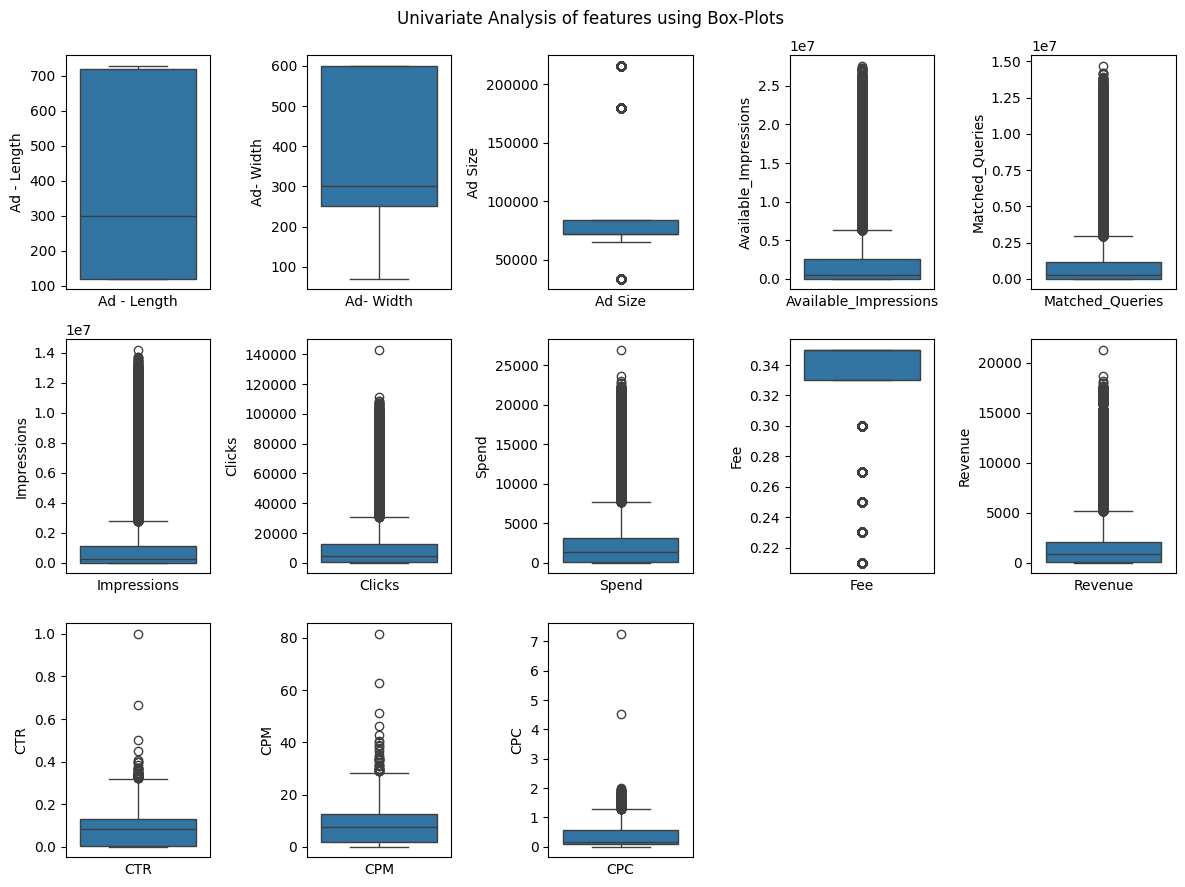

In [10]:
#univariate analysis for numerical columns:
# box plots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 9))  # Adjust figsize as needed

for i, col in enumerate(num_cols[:13]):
    if i < 5 :
        img_row = 0
        img_col = i
    elif i < 10:
        img_row = 1
        img_col = i-5
    else:
        img_row = 2
        img_col = i-10
    sns.boxplot(data=ads_data[col], ax=axes[img_row, img_col])  # Specify the correct axes
    axes[img_row, img_col].set_xticks([]) 
    axes[img_row, img_col].set_xlabel(col) 

fig.delaxes(axes[2][3])
fig.delaxes(axes[2][4])
fig.suptitle('Univariate Analysis of features using Box-Plots')
plt.draw()
plt.tight_layout()
plt.show()

fig.savefig('./images/uni_box_plot.svg')

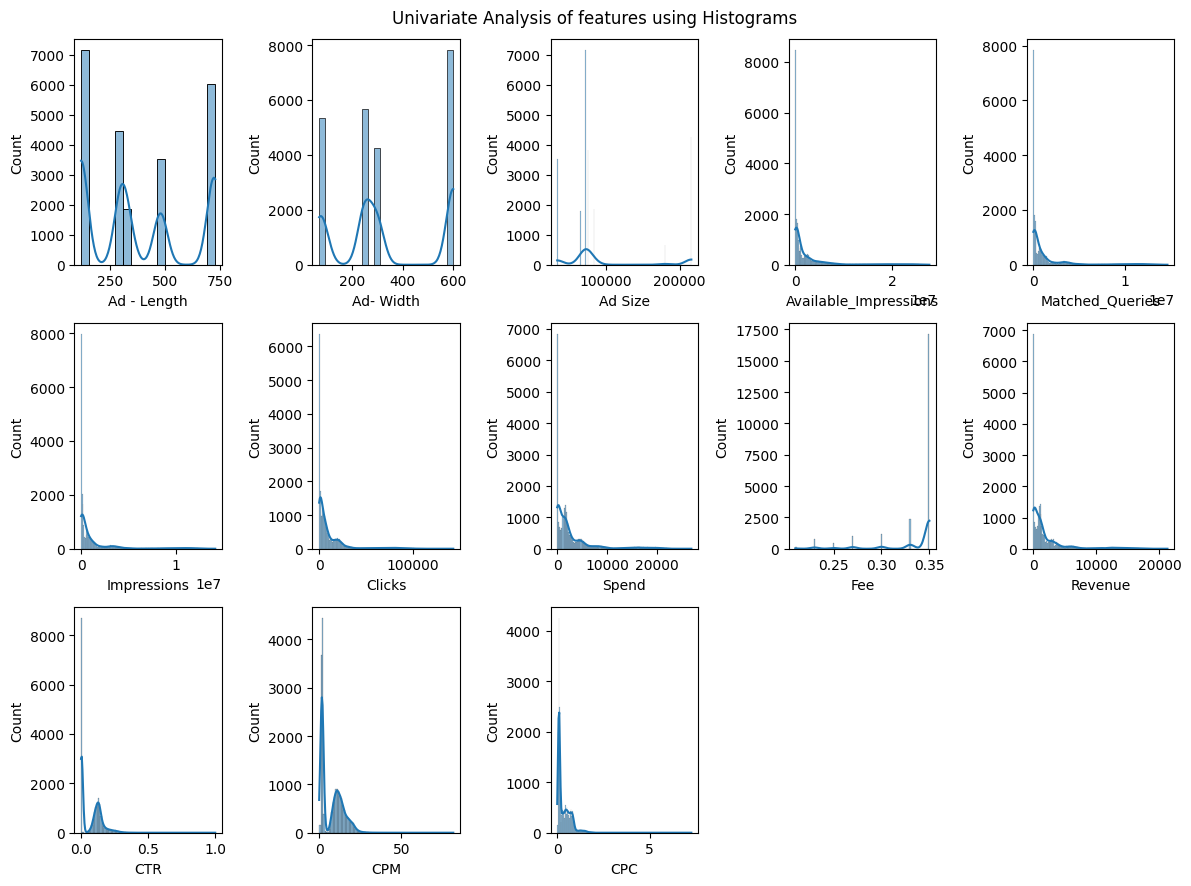

In [11]:
#univariate analysis for numerical columns:
# histograms
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 9))  # Adjust figsize as needed

for i, col in enumerate(num_cols[:13]):
    if i < 5 :
        img_row = 0
        img_col = i
    elif i < 10:
        img_row = 1
        img_col = i-5
    else:
        img_row = 2
        img_col = i-10
    sns.histplot(data=ads_data[col],kde=True, ax=axes[img_row, img_col])  # Specify the correct axes
    
fig.delaxes(axes[2][3])
fig.delaxes(axes[2][4])
fig.suptitle('Univariate Analysis of features using Histograms')
plt.draw()
plt.tight_layout()
plt.show()

fig.savefig('./images/uni_hist_plot.svg')

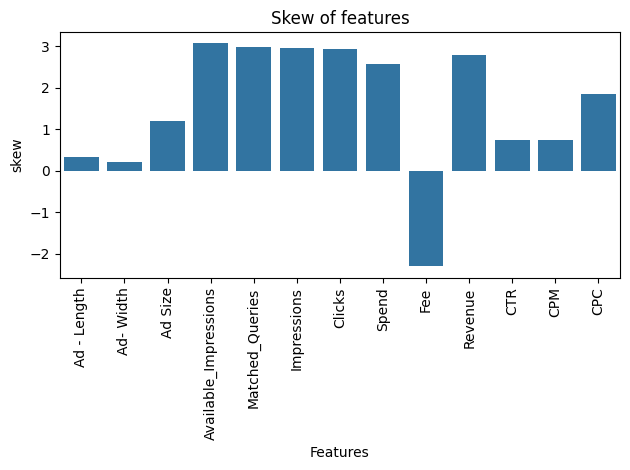

In [12]:
#Check the Skewness in the Data
skew = {}
for col in num_cols:
    skew[col] = ads_data[col].skew()
ads_skew = pd.DataFrame(skew, index=[0])
ads_skew = ads_skew.T.rename(columns={0: 'skew'})
sns.barplot(data=ads_skew,y='skew',x=ads_skew.index.values)
plt.xticks(rotation=90)
plt.title('Skew of features')
plt.xlabel('Features')
plt.tight_layout()
plt.savefig('./images/uni_skew_plot.svg')
plt.show()


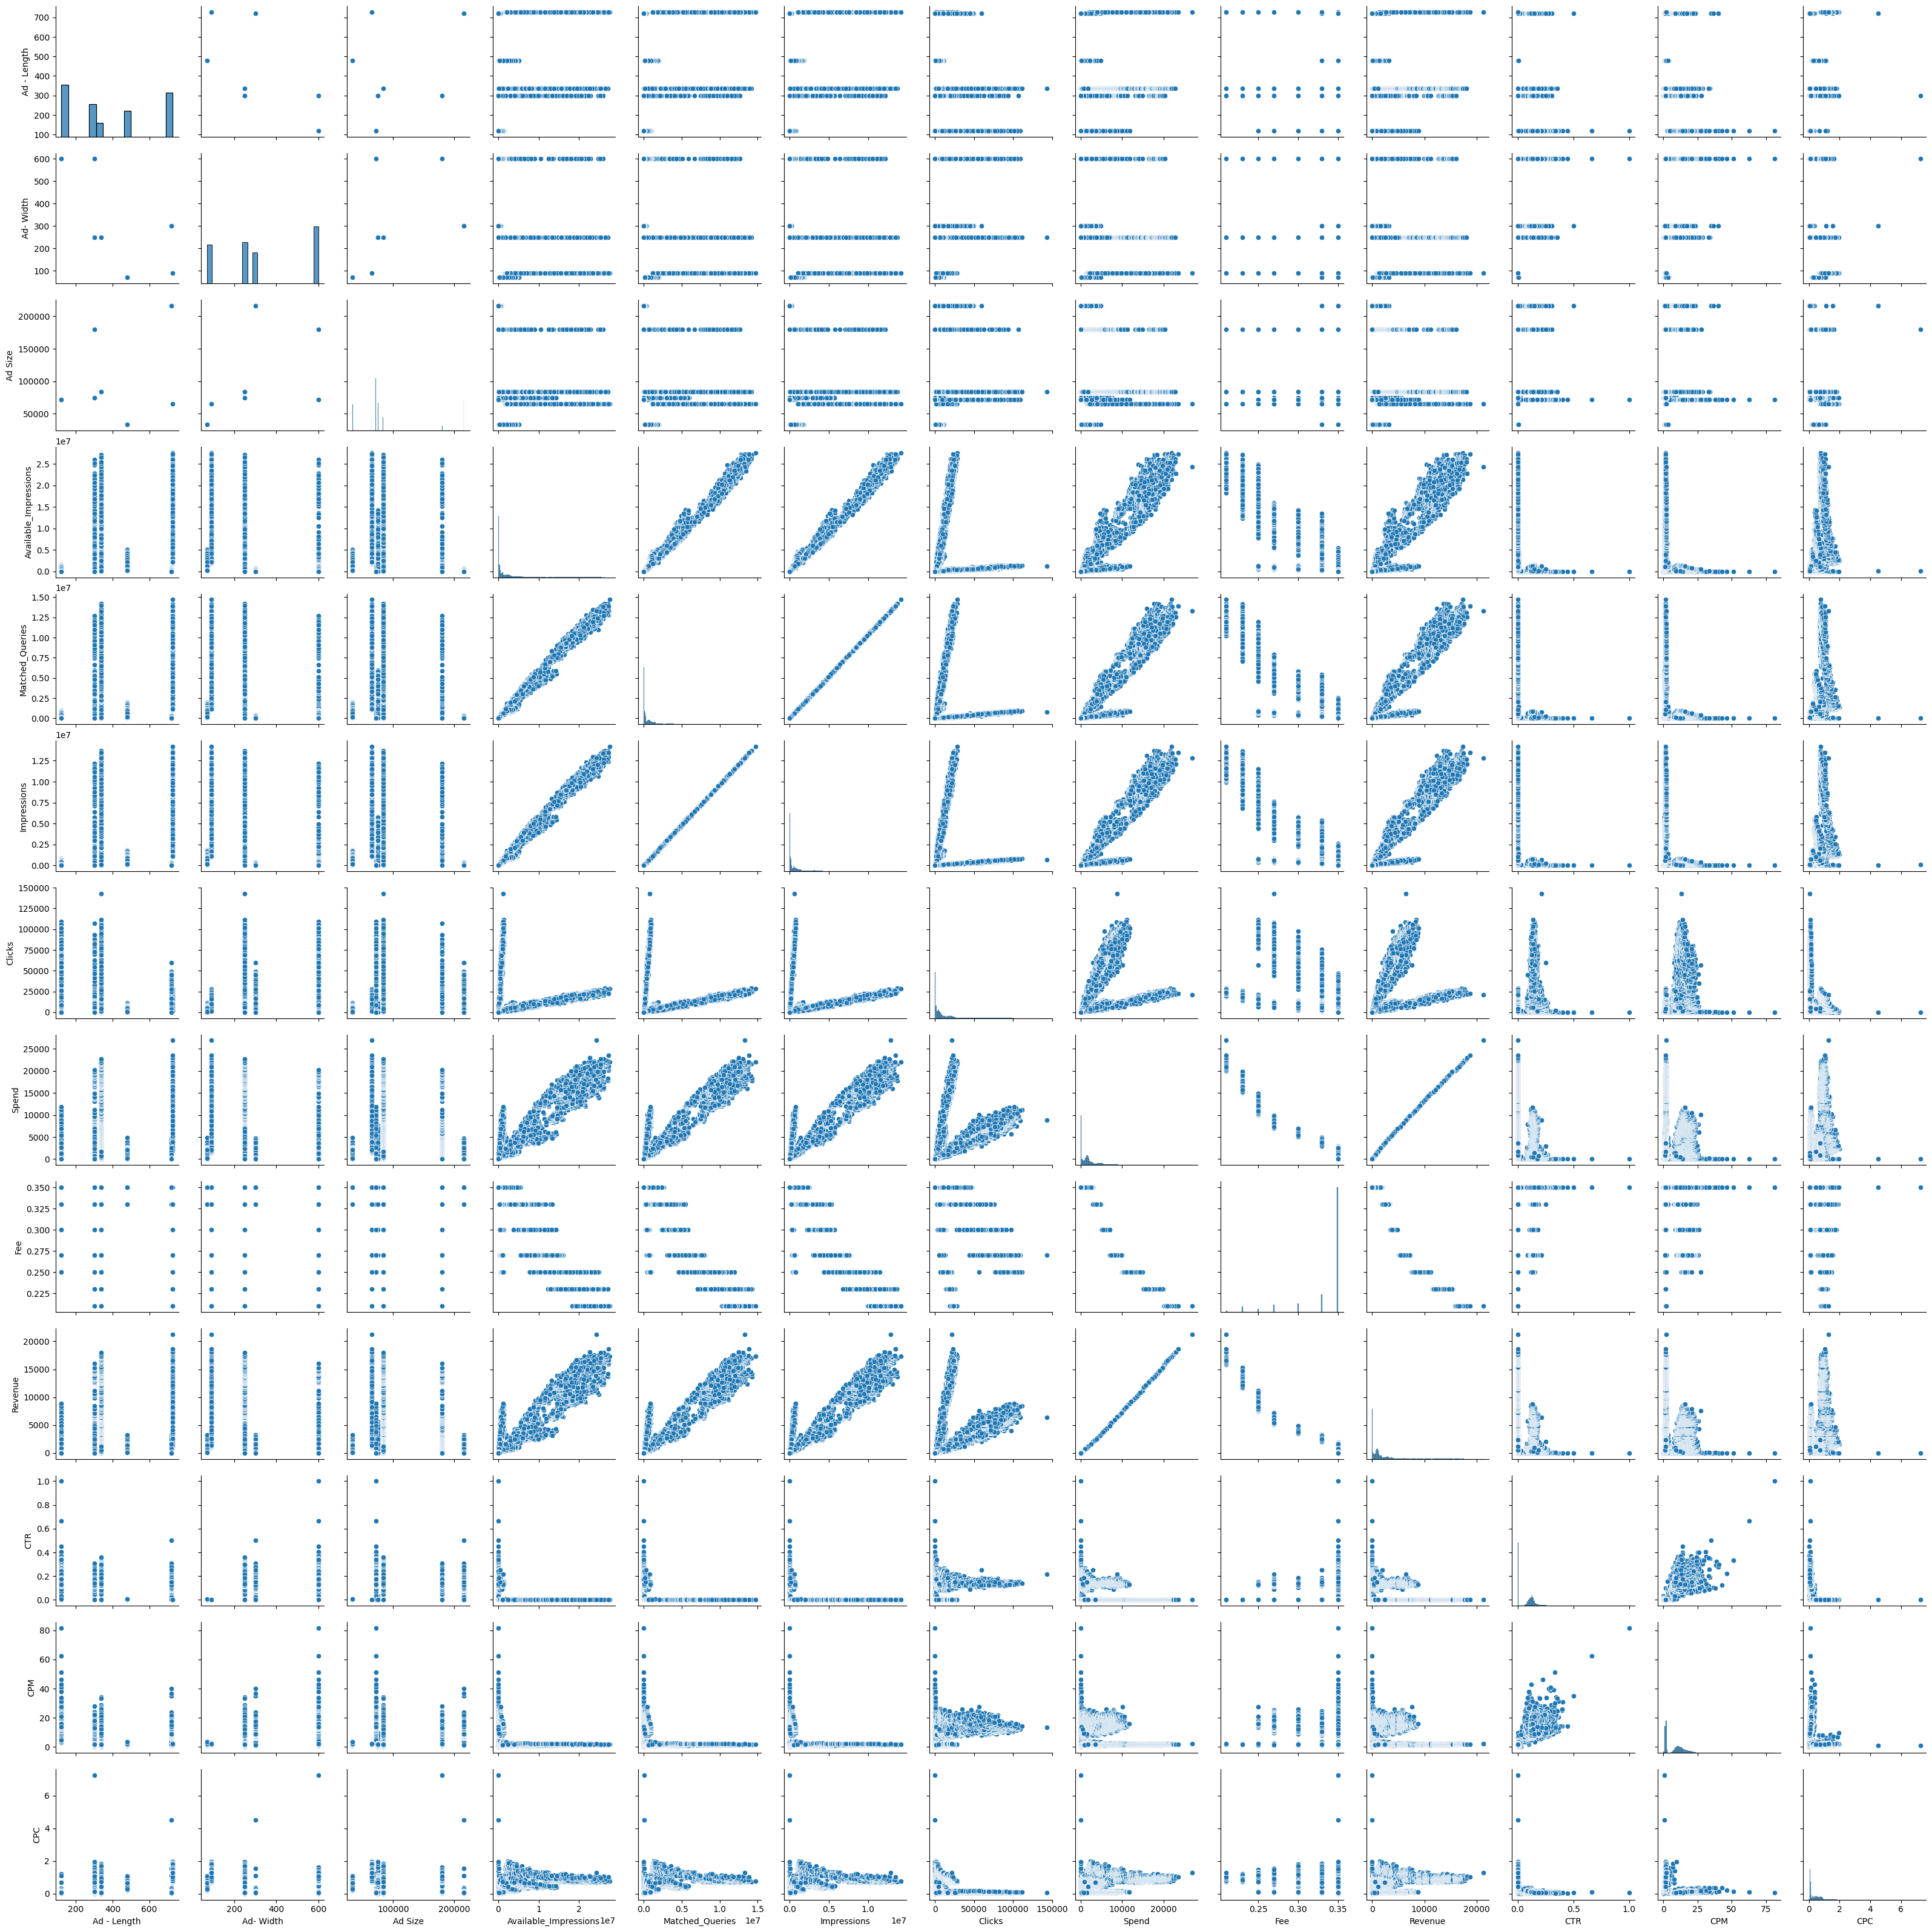

In [13]:
# do a pairplot on all the numerical columns
ads_num_data = ads_data[num_cols]
sns.pairplot(data=ads_num_data)
plt.savefig('./images/bi_pair_plot.jpg')
plt.show()

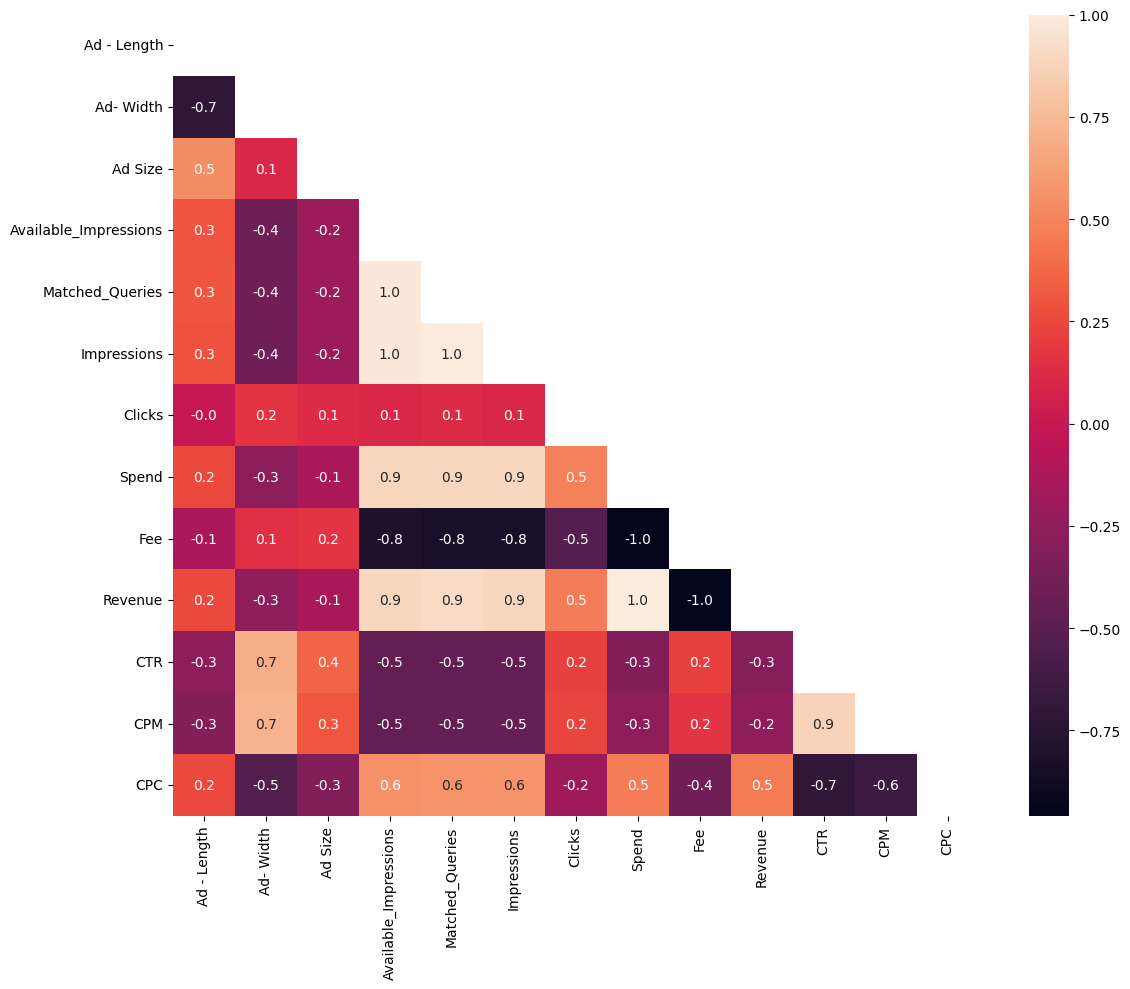

In [14]:
ads_num_corr = ads_data[num_cols].corr().round(2)
matrix = np.triu(ads_num_corr)
annot = True
plt.figure(figsize=(12,10))
sns.heatmap(ads_num_corr, mask=matrix,annot=annot,fmt=".1f")#annot is not given the full values will check this later for now will go with the color heat map
plt.tight_layout()
plt.savefig('./images/bi_heat_plot.svg')
plt.show()

#### Data Preprocessing
We will focus our data prepossing steps only on the nummerical columns as, we will be using only these in the clustering exercise.
##### Missing Value Check and Treatment
**CTR, CPM and CPC** have missing values and need to be treated, we will fill these values using the definitions given for each:

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100 
***"Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset."***

CPM = (Total Campaign Spend / Number of Impressions) * 1,000 
***"Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset."***

CPC = Total Cost (spend) / Number of Clicks 
***"Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset."***
##### Outlier Treatment 
There are Outliers in the dataset for 'Ad Size' 'Available_Impressions' 'Matched_Queries' 'Impressions' 'Clicks' 'Spend' 'Fee' 'Revenue' 'CTR' 'CPM' 'CPC'
, But since we are doing Clustering and outlier may form a signification cluster I will keep the outliers with out treatment
##### Scaling
There are features with different scales so we scale the data using the zscore method from the scipy libary.
##### Identification of Features to use in Clustering.
1. We will not use any of the categorical features: exculde : Timestamp, InventoryType, Ad Type, Platform, Device Type, and Format. Reason: Categorical Columns will need seprate treatment like one hot key encoding or KModes for example, which we will not explore in this exercise.
2. Ad-Size is made up as a calculated field of Ad - Length and Ad- Width: exclude : Ad- Length, Ad- Width. Reason: Both Length and Width is caputure in size.
3. Avalable_Impressions and Matched_Queries are highly correlated "0.99": exclude : Matched_Queries  Reason: Matched_Queries is not something the Ad agency can directly control.
4. Avalable_Impressions and Impressions are highly correlated "0.99": exclude : Avalable_Impressions  Reason: Impression is a better gauge of how a particular Advertisement is doing, as compared to the overall of avialble impressions.
5. Spend and Revenue are highly correlated "1": But we will keep both to just in case we have less spend high revenue clusters.
6. Final Columns used for Clustering: Ad Size, Impressions, Clicks, Spend, Fee, Revenue, CTR, CPM, CPC





In [15]:
#check for duplicates
ads_data.duplicated().sum()

0

In [16]:
#check for missing values
ads_data.isna().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [17]:
#update the values for CTR, CPM and CPC
ads_data.CTR = (ads_data.Clicks/ads_data.Impressions)*100
ads_data.CPM = (ads_data.Spend/ads_data.Impressions)*1000
ads_data.CPC = (ads_data.Spend/ads_data.Clicks)*1000
#check for missing values
ads_data.isna().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [18]:
#Scaling all the numercial columns to the same scale using zscore scaling
ads_num_data = ads_data[num_cols]
ads_num_data.head()
ads_scaled_data =zscore(ads_num_data)
ads_scaled_data.head()

Ad - Length  Ad- Width   Ad Size  Available_Impressions  Matched_Queries  \
0    -0.364496  -0.432797 -0.352218              -0.512407        -0.515248   
1    -0.364496  -0.432797 -0.352218              -0.512413        -0.515264   
2    -0.364496  -0.432797 -0.352218              -0.512213        -0.515235   
3    -0.364496  -0.432797 -0.352218              -0.512276        -0.515179   
4    -0.364496  -0.432797 -0.352218              -0.512531        -0.515281   

   Impressions    Clicks     Spend       Fee   Revenue       CTR       CPM  \
0    -0.510918 -0.615311 -0.665372  0.465447 -0.619693 -0.874593 -0.927054   
1    -0.510933 -0.615311 -0.665372  0.465447 -0.619693 -0.870136 -0.927054   
2    -0.510905 -0.615311 -0.665372  0.465447 -0.619693 -0.877606 -0.927054   
3    -0.510847 -0.615311 -0.665372  0.465447 -0.619693 -0.886208 -0.927054   
4    -0.510951 -0.615311 -0.665372  0.465447 -0.619693 -0.863404 -0.927054   

        CPC  
0 -0.986615  
1 -0.986615  
2 -0.986615  
3 -0.986615  
4 -0.986615

In [19]:
# Choose and create the final dataset for clustering analysis.
cols = ['Ad Size', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']
ads_cluster_data = ads_scaled_data[cols]
ads_cluster_data

Ad Size  Impressions    Clicks     Spend       Fee   Revenue  \
0     -0.352218    -0.510918 -0.615311 -0.665372  0.465447 -0.619693   
1     -0.352218    -0.510933 -0.615311 -0.665372  0.465447 -0.619693   
2     -0.352218    -0.510905 -0.615311 -0.665372  0.465447 -0.619693   
3     -0.352218    -0.510847 -0.615311 -0.665372  0.465447 -0.619693   
4     -0.352218    -0.510951 -0.615311 -0.665372  0.465447 -0.619693   
...         ...          ...       ...       ...       ...       ...   
23061  1.939086    -0.511050 -0.615311 -0.665355  0.465447 -0.619678   
23062  1.939086    -0.511050 -0.615311 -0.665362  0.465447 -0.619684   
23063  1.939086    -0.511050 -0.615311 -0.665360  0.465447 -0.619682   
23064 -0.400970    -0.511050 -0.615311 -0.665355  0.465447 -0.619678   
23065  1.939086    -0.511050 -0.615311 -0.665350  0.465447 -0.619674   

            CTR       CPM       CPC  
0     -0.874593 -0.927054 -0.986615  
1     -0.870136 -0.927054 -0.986615  
2     -0.877606 -0.927054 -0.986615  
3     -0.886208 -0.927054 -0.986615  
4     -0.863404 -0.927054 -0.986615  
...         ...       ...       ...  
23061  9.888962  6.801294 -0.781484  
23062  4.490471  1.281046 -0.869397  
23063  9.888962  4.593195 -0.840092  
23064  9.888962  6.801294 -0.781484  
23065  4.490471  4.041170 -0.722875  

[23066 rows x 9 columns]

#### Hierarchical Clustering
##### Construct a dendogram using Ward linkage and Euclidean distance
We constructed the dendogram, using the Ward linkage.
##### Indentify optimal number of Clusters.
Looking at the dendogarm it looks like 3 or 4 clusters should be optimal, but instead of relying on this we will calculate the Silhouette Score at various values of clusters to check what would be optimal.
Doing this we see that it suggests that 2 or 5 clusters would be optimal with 2 having more clear boundaries between the clusters than 5, but 5 is also slightly higher than .5 and closer to 1 so would be good to investigate

In [20]:
# Get the clusters and dendrogram based on Ward linkage
wardlink = linkage(ads_cluster_data,method= 'ward', metric='euclidean')

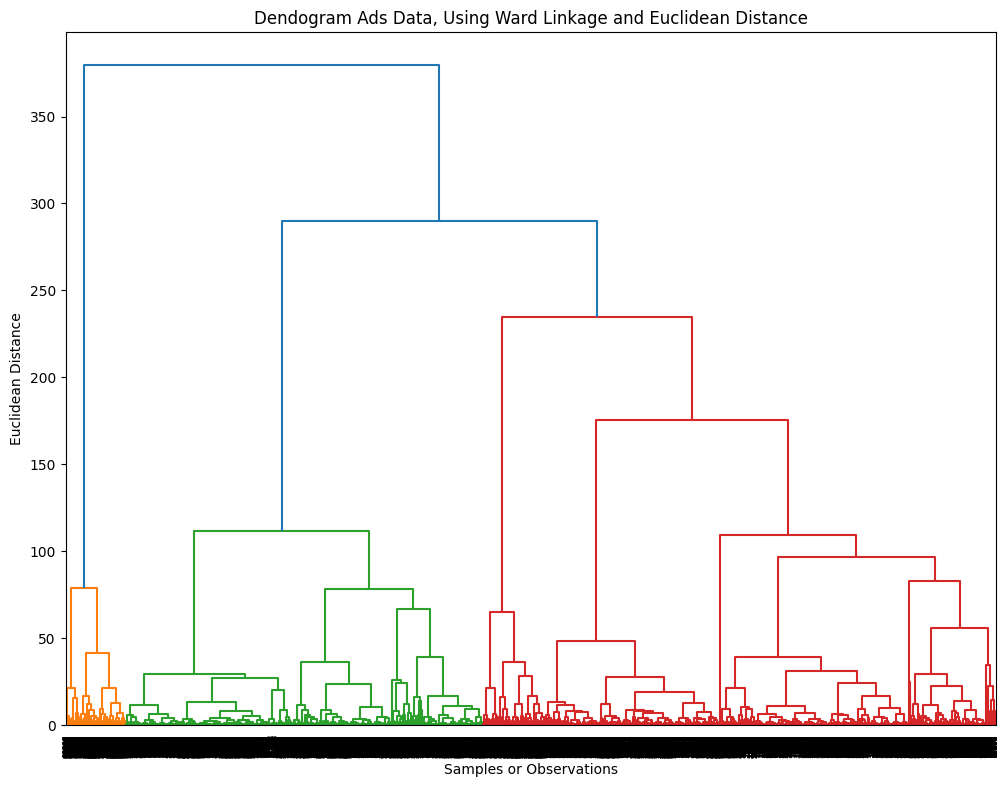

In [21]:
plt.figure(figsize=(12,9))
dend = dendrogram(wardlink)
plt.ylabel('Euclidean Distance')
plt.xlabel('Samples or Observations')
plt.title('Dendogram Ads Data, Using Ward Linkage and Euclidean Distance')
plt.savefig('./images/scaled_dend_plot.svg')
plt.show()

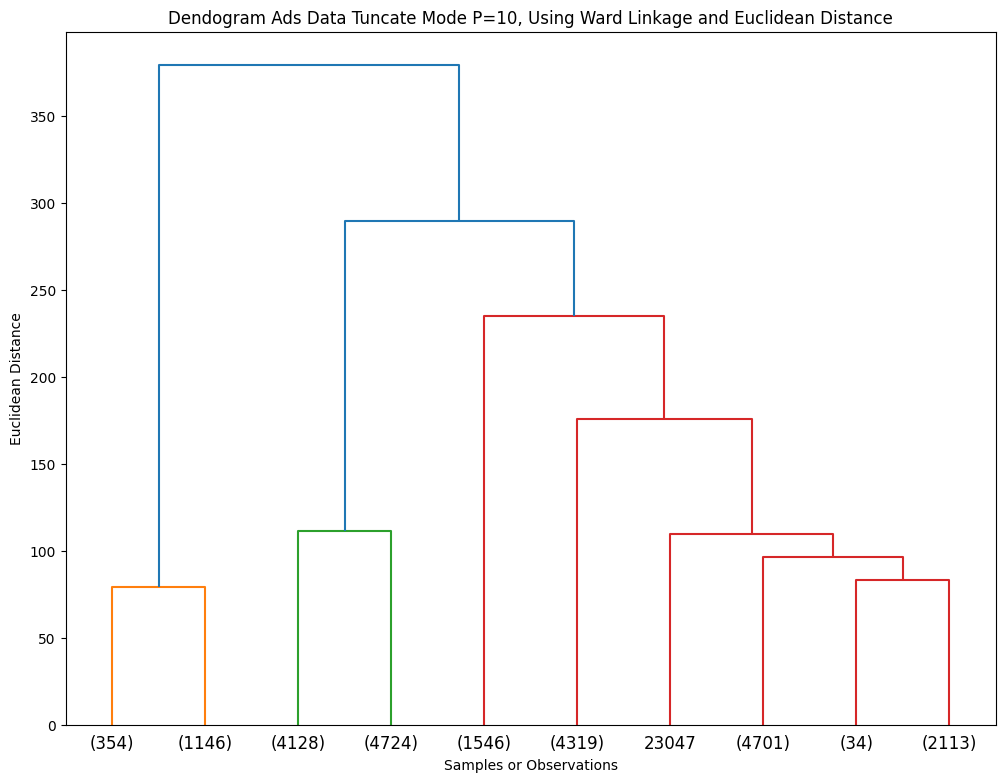

In [22]:
plt.figure(figsize=(12,9))
dend_p = dendrogram(wardlink, truncate_mode= 'lastp', p = 10)
plt.ylabel('Euclidean Distance')
plt.xlabel('Samples or Observations')
plt.title('Dendogram Ads Data Tuncate Mode P=10, Using Ward Linkage and Euclidean Distance')
plt.savefig('./images/scaled_dend_last_p_plot.svg')
plt.show()

In [23]:
# finding the differrent siloutte scorce at different value of k and plotting the same
ss_scores = []
for k in range(2,20):
    labels = fcluster(wardlink,t=k, criterion='maxclust')
    sil = ss(ads_cluster_data,labels)
    ss_scores.append(sil)
    print(f"Silhouette Score (K={k}): {sil:.4f}")

Silhouette Score (K=2): 0.6025
Silhouette Score (K=3): 0.3991
Silhouette Score (K=4): 0.4643
Silhouette Score (K=5): 0.5164
Silhouette Score (K=6): 0.4615
Silhouette Score (K=7): 0.4626
Silhouette Score (K=8): 0.4489
Silhouette Score (K=9): 0.4517
Silhouette Score (K=10): 0.4459
Silhouette Score (K=11): 0.4760
Silhouette Score (K=12): 0.4816
Silhouette Score (K=13): 0.4756
Silhouette Score (K=14): 0.4762
Silhouette Score (K=15): 0.4370
Silhouette Score (K=16): 0.4285
Silhouette Score (K=17): 0.4237
Silhouette Score (K=18): 0.4209
Silhouette Score (K=19): 0.4172


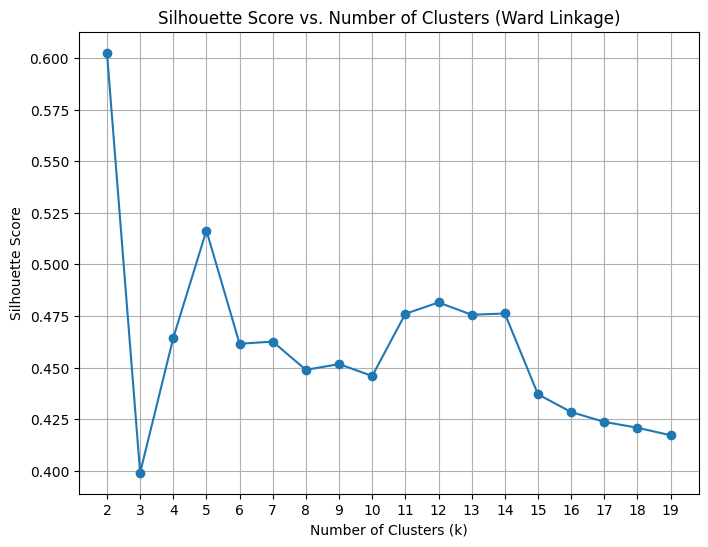

In [24]:
# Plotting Silhouette Scores to check which one would be optimal
# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2,20),ss_scores, marker='o')
plt.xticks(range(2,20))
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters (Ward Linkage)")
plt.grid(True)
plt.savefig('./images/scaled_ss_score_plot.svg')
plt.show()

In [25]:
# add the clusters labels to the dataset
hcluster_K2_labels = fcluster(wardlink,t=2, criterion='maxclust')
hcluster_K5_labels = fcluster(wardlink,t=5, criterion='maxclust')
ads_data['hcluster_k2'] = hcluster_K2_labels
ads_data['hcluster_k5'] = hcluster_K5_labels
ads_data.head()
ads_data['hcluster_k2'].value_counts()
ads_data['hcluster_k5'].value_counts()

hcluster_k5
2    8852
5    6849
4    4319
3    1546
1    1500
Name: count, dtype: int64

#### K-means Clustering
##### Apply K-means Clustering
Applied the Kmeans clusting to the dataset for value os k=2 and random_state=123, got an Inertia value of 142207.
But this does not tell if this is the ideal number of clusters using k-means, we will get the Inertia value for different values of k and plot to get the Elbow Curve.
##### Plot the Elbow curve 
Plotting the elbow curve we see that the break of the elbow is seen when K=6, we will also below Check the Silhouette Scores
##### Check Silhouette Scores 
Doing this we see that it suggests that 2, 10, 11, 12, 13 clusters would be optimal with 2 having more clear boundaries between the clusters than the rest, since 10, 11, 12, 13 Clusters would be too many clusters for this exercise we will explore 2 clusters, but investigate the larger clusters at a later point if needed
##### Figure out the appropriate number of clusters 
We see that Silhouette Scores suggests that 2, 10, 11, 12, 13 clusters would be optimal with 2 having more clear boundaries between the clusters than the rest.
and the Elbow method suggests we look at k = 6.
So we will investigate k=2 and k=6 as the apporpriate number of clusters to investigate.
##### Cluster Profiling
When we see the clusters created by the two methods hierarchical and k-means we see that the Clusters for k=2 has an overlap, for this exercise we will concentrate on this, it would be good to explore the other two at a later point for the business.
Looking at the Clusters we have the following:
Cluster 1 has lower "Ad Size , Fee, CTR, CPM", Higer "Impressions , Clicks , Spend, Revenue, CPC": Small_Ad_less_CPM_more_Revenue
Cluster 2 has Higher "Ad Size , Fee, CTR, CPM", Lower "Impressions , Clicks , Spend, Revenue, CPC": Large_Ad_High_CPM_less_Revenue

In [26]:
# Apply the K-means Clustering lets apply using k=2 for now
kmeans = KMeans(n_clusters = 2, random_state=123)
kmeans.fit(ads_cluster_data)

KMeans(n_clusters=2, random_state=123)

In [27]:
#Get the inertia values for k = 2
kmeans.inertia_

134830.04498547228

In [28]:
random_state=123
ssw = []
for i in range(2,21):
    KM = KMeans(n_clusters = i, random_state=random_state)
    KM.fit(ads_cluster_data)
    ssw.append(KM.inertia_)

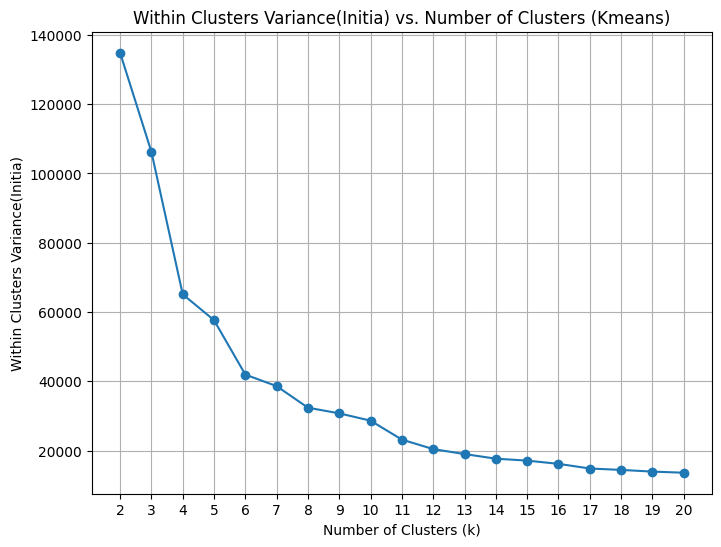

In [29]:
#plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(2,21), ssw,marker='o')
plt.xticks(range(2,21))
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within Clusters Variance(Initia)")
plt.title("Within Clusters Variance(Initia) vs. Number of Clusters (Kmeans)")
plt.grid(True)
plt.savefig('./images/scaled_elbow_plot.svg')
plt.show()

In [30]:
# finding the differrent siloutte scorce at different value of k and plotting the same
ss_scores = []
for k in range(2,21):
    KM = KMeans(n_clusters = k, random_state=random_state)
    KM.fit(ads_cluster_data)    
    labels = KM.labels_
    sil = ss(ads_cluster_data,labels)
    ss_scores.append(sil)
    print(f"Silhouette Score (K={k}): {sil:.4f}")

Silhouette Score (K=2): 0.5673
Silhouette Score (K=3): 0.5239
Silhouette Score (K=4): 0.4678
Silhouette Score (K=5): 0.4031
Silhouette Score (K=6): 0.4942
Silhouette Score (K=7): 0.4928
Silhouette Score (K=8): 0.5077
Silhouette Score (K=9): 0.5013
Silhouette Score (K=10): 0.5017
Silhouette Score (K=11): 0.5029
Silhouette Score (K=12): 0.4801
Silhouette Score (K=13): 0.4801
Silhouette Score (K=14): 0.4783
Silhouette Score (K=15): 0.4784
Silhouette Score (K=16): 0.4729
Silhouette Score (K=17): 0.4765
Silhouette Score (K=18): 0.4702
Silhouette Score (K=19): 0.4712
Silhouette Score (K=20): 0.4749


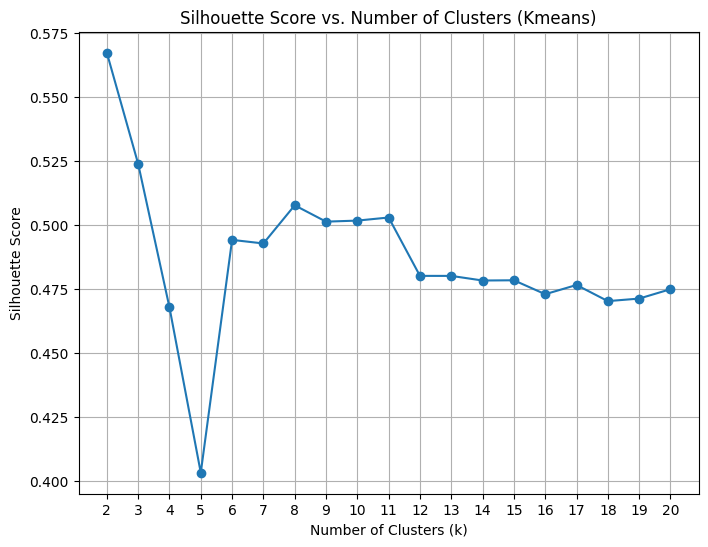

In [31]:
# Plotting Silhouette Scores to check which one would be optimal
# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2,21),ss_scores, marker='o')
plt.xticks(range(2,21))
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters (Kmeans)")
plt.grid(True)
plt.savefig('./images/scaled_ss_score_kmean_plot.svg')
plt.show()

In [32]:
# add the clusters labels to the dataset
KM = KMeans(n_clusters = 2, random_state=random_state)
KM.fit(ads_cluster_data)    
kmeans_K2_labels = KM.labels_

KM = KMeans(n_clusters = 6, random_state=random_state)
KM.fit(ads_cluster_data)    
kmeans_K6_labels = KM.labels_

ads_data['kmeans_k2'] = kmeans_K2_labels
ads_data['kmeans_k6'] = kmeans_K6_labels
ads_data.head()

ads_data['kmeans_k6'].value_counts()
ads_data['kmeans_k2'].value_counts()

kmeans_k2
1    20539
0     2527
Name: count, dtype: int64

In [33]:
# Check the Cluster profiling
# Choose and create the final dataset for clustering analysis.
cols = ['Ad Size', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC','hcluster_k2','hcluster_k5','kmeans_k2','kmeans_k6']
cluster_profile_data = ads_data[cols]
cluster_profile_data.head()
hcluster_k2_cols = ['Ad Size', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC','hcluster_k2']
hcluster_k5_cols = ['Ad Size', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC','hcluster_k5']
kmeans_k2_cols = ['Ad Size', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC','kmeans_k2']
kmeans_k6_cols = ['Ad Size', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC','kmeans_k6']

# hcluster k=2 profiling
hcluster_k2_data = cluster_profile_data[hcluster_k2_cols]
print('Cluster Profiling hcluster k=2')
print(f'Cluster 1 has lower "Ad Size , Fee, CTR, CPM", Higer "Impressions , Clicks , Spend, Revenue, CPC"')
print(f'Cluster 2 has Higher "Ad Size , Fee, CTR, CPM", Lower "Impressions , Clicks , Spend, Revenue, CPC"')
hcluster_k2_data.groupby('hcluster_k2').mean().round(2)

# Kmeans k=2 profiling
kmeans_k5_data = cluster_profile_data[kmeans_k2_cols]
kmeans_k5_data.groupby('kmeans_k2').mean().round(2)
print('Cluster Profiling Kmeans k=2')
print(f'Cluster 0 has lower "Ad Size , Fee, CTR, CPM", Higer "Impressions , Clicks , Spend, Revenue, CPC"')
print(f'Cluster 1 has Higher "Ad Size , Fee, CTR, CPM", Lower "Impressions , Clicks , Spend, Revenue, CPC"')
kmeans_k5_data.groupby('kmeans_k2').mean().round(2)

Cluster Profiling hcluster k=2
Cluster 1 has lower "Ad Size , Fee, CTR, CPM", Higer "Impressions , Clicks , Spend, Revenue, CPC"
Cluster 2 has Higher "Ad Size , Fee, CTR, CPM", Lower "Impressions , Clicks , Spend, Revenue, CPC"
Cluster Profiling Kmeans k=2
Cluster 0 has lower "Ad Size , Fee, CTR, CPM", Higer "Impressions , Clicks , Spend, Revenue, CPC"
Cluster 1 has Higher "Ad Size , Fee, CTR, CPM", Lower "Impressions , Clicks , Spend, Revenue, CPC"


Ad Size  Impressions    Clicks     Spend   Fee  Revenue   CTR  \
kmeans_k2                                                                   
0          72424.35   5777328.73  40849.54  12489.51  0.25  9436.59  5.53   
1          99658.06    683459.74   6966.45   1503.00  0.35   999.98  8.76   

            CPM     CPC  
kmeans_k2                
0          6.88  598.60  
1          8.58  304.45

#### Actionable Insights & Recommendations
1. There is clearly two groups : Small_Ad_less_CPM_more_Revenue and Large_Ad_more_CPM_less_Revenue
2. More effective type of ads by size would be smaller ads with sizes around 72276.
3. Inorder to effect Revenue better, should consider the avenues where the Fee is 0.25 or lessser.
4. A Marketing Strategy to move form "Large_Ad_more_CPM_less_Revenue" segments to "Small_Ad_less_CPM_more_Revenue" segements would be benificial.
5. We should study the "Small_Ad_less_CPM_more_Revenue" more closely along with the mix of 'InventoryType' 'Ad Type' 'Platform' 'Device Type' 'Format' which make up this category to see how different it is from the "Large_Ad_more_CPM_less_Revenue" Group to help us move ads to the 1st group.

## Problem 2 - PCA

### Overview
We have been given India Census data, the said data set has too many features to find useful details, We are tasked to use the Principal Components Analysis Statistical technique, to reduce the number of features be able to extract meaningfull information.

### Dataset
The data set given has 61 Features and 640 observations, the data is by state and district code.
All the features in the data are numeric expect, State and Area Name.
| Name| Description |
| --- | --- |
| State | State Code |
| District | District Code |
| Name | Name |
| TRU1 | Area Name |
| No_HH | No of Household |
| TOT_M | Total population Male |
| TOT_F | Total population Female |
| M_06 | Population in the age group 0-6 Male |
| F_06 | Population in the age group 0-6 Female |
| M_SC | Scheduled Castes population Male |
| F_SC | Scheduled Castes population Female |
| M_ST | Scheduled Tribes population Male |
| F_ST | Scheduled Tribes population Female |
| M_LIT | Literates population Male |
| F_LIT | Literates population Female |
| M_ILL | Illiterate Male |
| F_ILL | Illiterate Female |
| TOT_WORK_M | Total Worker Population Male |
| TOT_WORK_F | Total Worker Population Female |
| MAINWORK_M | Main Working Population Male |
| MAINWORK_F | Main Working Population Female |
| MAIN_CL_M | Main Cultivator Population Male |
| MAIN_CL_F | Main Cultivator Population Female |
| MAIN_AL_M | Main Agricultural Labourers Population Male |
| MAIN_AL_F | Main Agricultural Labourers Population Female |
| MAIN_HH_M | Main Household Industries Population Male |
| MAIN_HH_F | Main Household Industries Population Female |
| MAIN_OT_M | Main Other Workers Population Male |
| MAIN_OT_F | Main Other Workers Population Female |
| MARGWORK_M | Marginal Worker Population Male |
| MARGWORK_F | Marginal Worker Population Female |
| MARG_CL_M | Marginal Cultivator Population Male |
| MARG_CL_F | Marginal Cultivator Population Female |
| MARG_AL_M | Marginal Agriculture Labourers Population Male |
| MARG_AL_F | Marginal Agriculture Labourers Population Female |
| MARG_HH_M | Marginal Household Industries Population Male |
| MARG_HH_F	| Marginal Household Industries Population Female |
| MARG_OT_M | Marginal Other Workers Population Male |
| MARG_OT_F | Marginal Other Workers Population Female |
| MARGWORK_3_6_M | Marginal Worker Population 3-6 Male |
| MARGWORK_3_6_F | Marginal Worker Population 3-6 Female |
| MARG_CL_3_6_M | Marginal Cultivator Population 3-6 Male |
| MARG_CL_3_6_F | Marginal Cultivator Population 3-6 Female |
| MARG_AL_3_6_M | Marginal Agriculture Labourers Population 3-6 Male |
| MARG_AL_3_6_F | Marginal Agriculture Labourers Population 3-6 Female |
| MARG_HH_3_6_M | Marginal Household Industries Population 3-6 Male |
| MARG_HH_3_6_F | Marginal Household Industries Population 3-6 Female |
| MARG_OT_3_6_M | Marginal Other Workers Population Person 3-6 Male |
| MARG_OT_3_6_F | Marginal Other Workers Population Person 3-6 Female |
| MARGWORK_0_3_M | Marginal Worker Population 0-3 Male |
| MARGWORK_0_3_F | Marginal Worker Population 0-3 Female |
| MARG_CL_0_3_M | Marginal Cultivator Population 0-3 Male |
| MARG_CL_0_3_F | Marginal Cultivator Population 0-3 Female |
| MARG_AL_0_3_M | Marginal Agriculture Labourers Population 0 -3 Male |
| MARG_AL_0_3_F | Marginal Agriculture Labourers Population 0-3 Female
| MARG_HH_0_3_M | Marginal Household Industries Population 0-3 Male
| MARG_HH_0_3_F | Marginal Household Industries Population 0-3 Female
| MARG_OT_0_3_M | Marginal Other Workers Population 0-3 Male
| MARG_OT_0_3_F | Marginal Other Workers Population 0-3 Female
| NON_WORK_M | Non Working Population Male
| NON_WORK_F | Non Working Population Female

### Objective
We are tasked to use the Principal Components Analysis Statistical technique, to reduce the number of features be able to extract meaningfull information.

### Questions Asked

####  Define the problem and perform Exploratory Data Analysis
#####  Problem Definition
We have been given India Census data, the said data set has too many features to find useful details, We are tasked to use the Principal Components Analysis Statistical technique, to reduce the number of features be able to extract meaningfull information.
#####  Check shape, Data types
The dataset provided has 640 observations with 61 features.
The dataset has 2 columns with string values, 59 columns with int values.
##### statistical summary - Perform an EDA on the data to extract useful insights
***"Note: 1. Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F"***

I will pick No_HH, TOT_M, TOT_F, M_06, F_06
Checking the above 5 variables this is what we find.
1. State with the most households is Uttar Pradesh with ~4 million households which ~12% of the total households, State with the least households is Dadara & Nagar Havelli with 4288 households making up ~0.013% of the total households.
2. District with the most households is North Twenty Four Parganas in West Bengal with ~300K households which is abut .94% of the overall households, District with the least number of households is the Dibang Valley in Arunachal Pradesh with 350 households making up 0.001% of the total households
3. Since the Dataset is an "abstract for female headed households", the Gender ratio= TOT_F/TOT_M is higher than 100% for all states.
4. State with the highest Gender Ratio is Andra Pradesh with the GR at ~1.9, State with the least Gender Ratio is lakshadweep with the GR at ~1.2
5. District "['Krishna']" from the State "['Andhra Pradesh']"has the most Gender Ratio with the GR ~2.3, District "['Lakshadweep']" from the State "['Lakshadweep']"has the least Gender Ratiowith the GR at ~1.2.
6. State with the highest Child Gender Ratio (CGR) = F_06/M_06 is Arunachal Pradesh with CGR ~1.1, State with the least CGR is Haryana with CGR ~0.9
7. District "['East Kameng']" from the State "['Arunachal Pradesh']"has the most Child Gender Ratio with CGR ~1.2,District "['Samba']" from the State "['Jammu & Kashmir']"has the least Gender Ratio with CGR ~0.8.


In [35]:
census_data = pd.read_excel('./data/PCA_India_Data_Census.xlsx')
census_data.head()
#create a copy of the data 
census_data_copy = census_data.copy()

In [36]:
census_data.shape

(640, 61)

In [37]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

C:\Users\kurtg\AppData\Local\Temp\ipykernel_20604\2429036010.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['{:,.0f}'.format(x) for x in axes[0].get_xticks()])


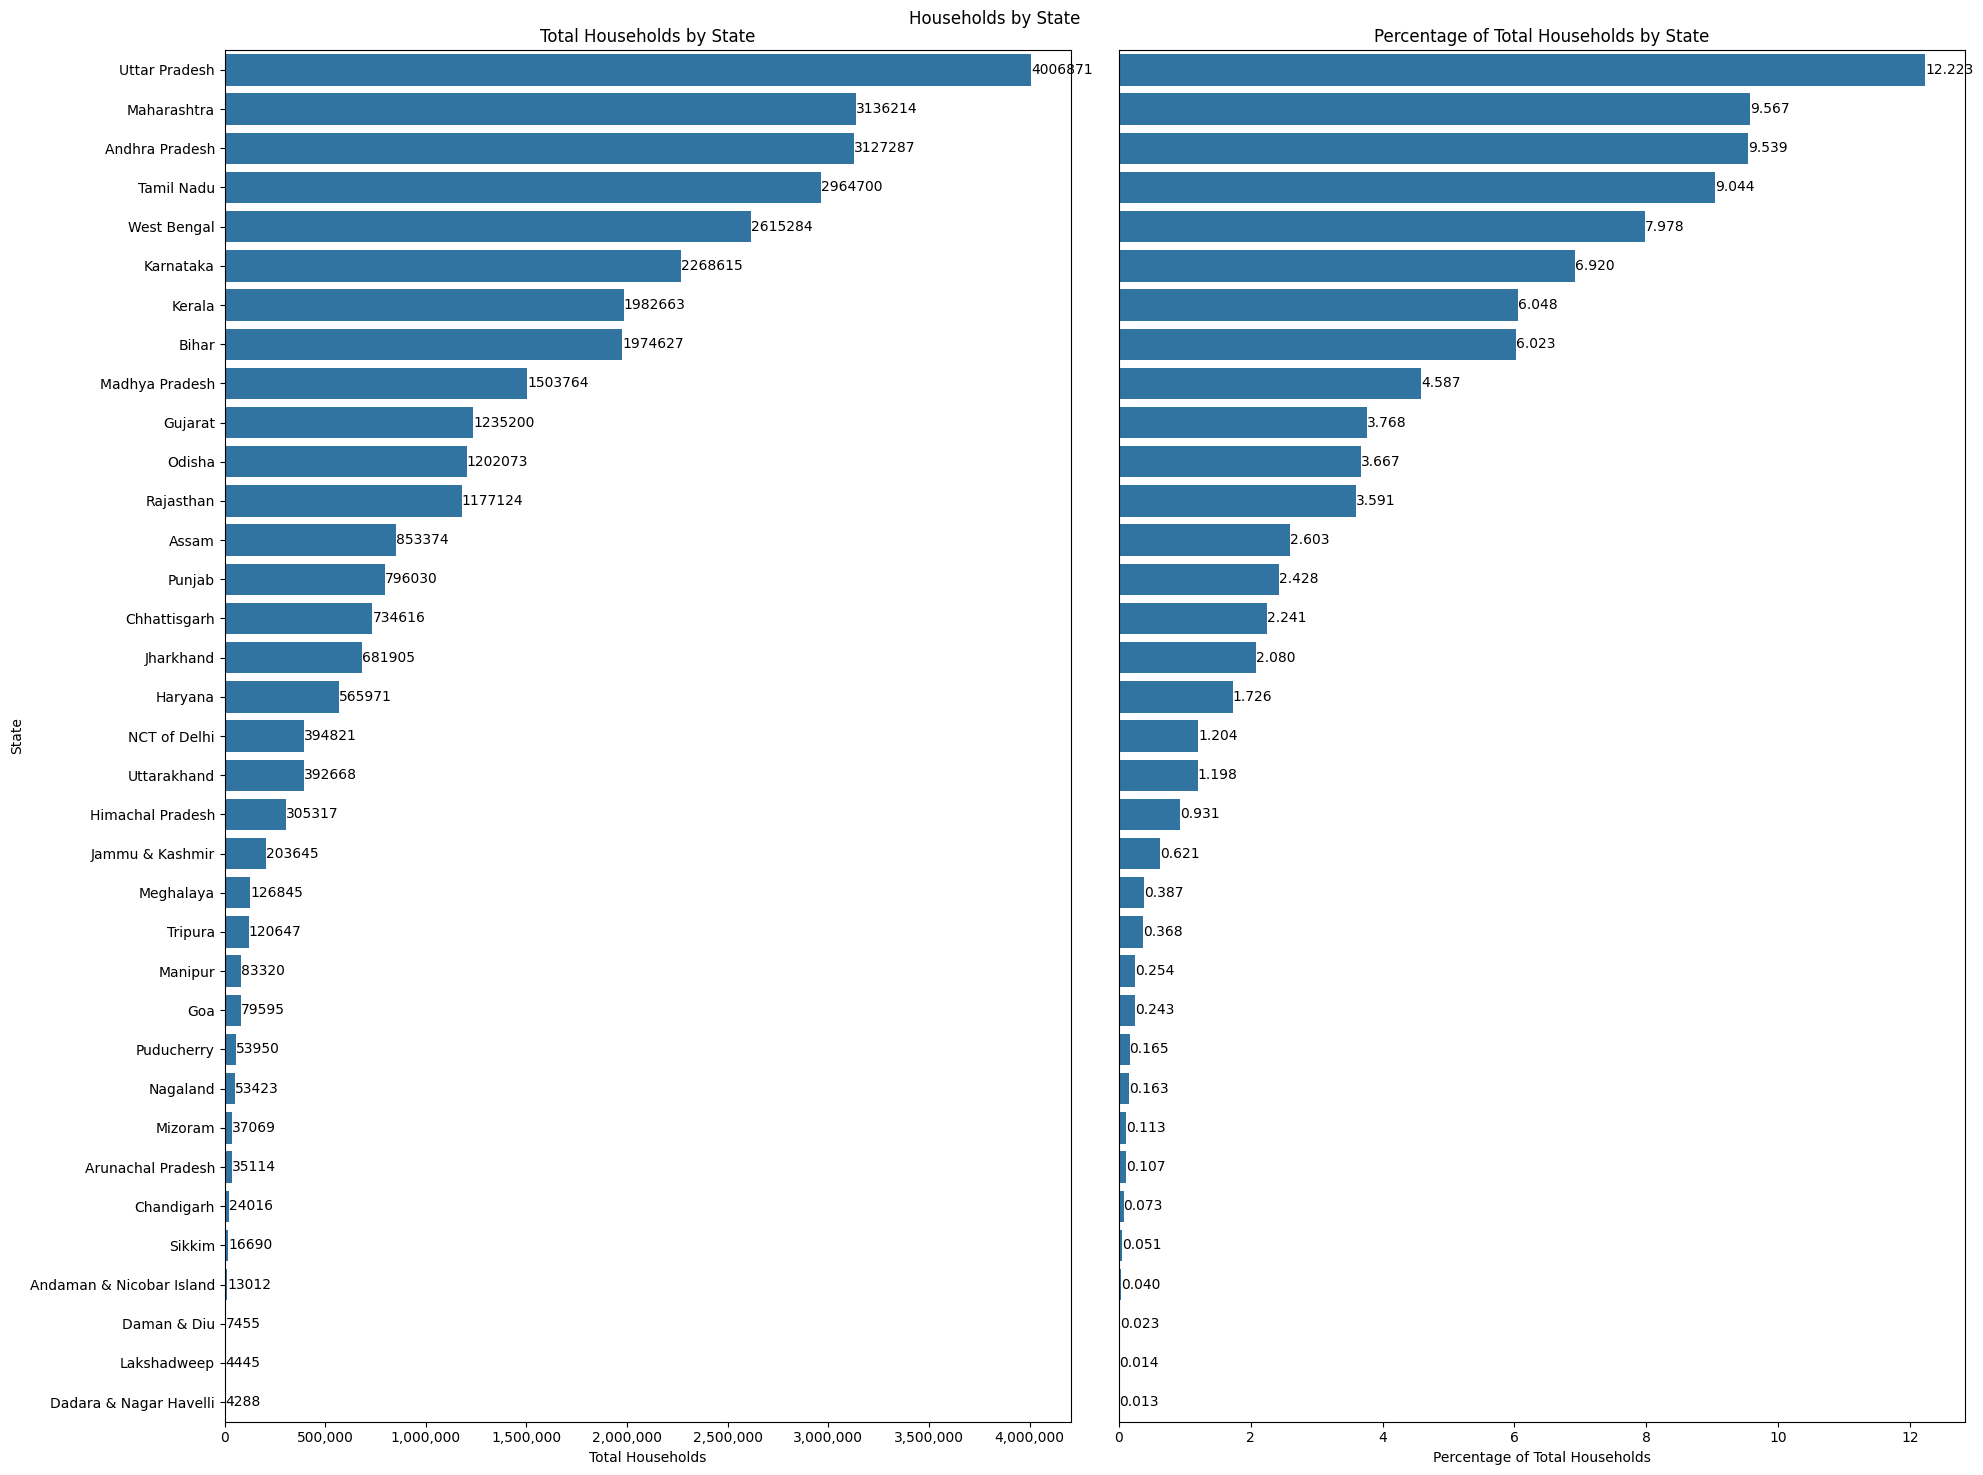

In [38]:
# HH by State
eda_cols = ['State','Area Name','No_HH','TOT_M','TOT_F','M_06','F_06']
eda_data = census_data[eda_cols]
HH_sum = eda_data.groupby('State')['No_HH'].sum().sort_values(ascending=False).reset_index().rename(columns={'No_HH': 'Tot_HH'})
HH_sum['percent'] = round((HH_sum.Tot_HH/HH_sum.Tot_HH.sum())*100,3)
HH_sum.set_index(keys='State',inplace=True)

fig, axes= plt.subplots(nrows=1,ncols=2,figsize=(20,15))
sns.barplot(data=HH_sum,x='Tot_HH',y=HH_sum.index.values,ax=axes[0])
for i in axes[0].containers:
    axes[0].bar_label(i, fmt='%.0f')

axes[0].set_xticklabels(['{:,.0f}'.format(x) for x in axes[0].get_xticks()])
axes[0].set_xlabel('Total Households')
axes[0].set_ylabel('State')
axes[0].set_title('Total Households by State')

sns.barplot(data=HH_sum,x='percent',y=HH_sum.index.values,ax=axes[1])
for i in axes[1].containers:
    axes[1].bar_label(i, fmt='%.3f')

axes[1].set_xlabel('Percentage of Total Households')
axes[1].set_title('Percentage of Total Households by State')
axes[1].set_yticks([])

fig.suptitle('Households by State')
plt.tight_layout()
plt.savefig('./images/cencus_tot_HH.svg')
plt.show()

In [39]:
# HH by Area/District
eda_cols = ['State','Area Name','No_HH','TOT_M','TOT_F','M_06','F_06']
eda_data = census_data[eda_cols]
HH_sum = eda_data.groupby('Area Name')['No_HH'].sum().sort_values(ascending=False).reset_index().rename(columns={'No_HH': 'Tot_HH'})
HH_sum['percent'] = round((HH_sum.Tot_HH/HH_sum.Tot_HH.sum())*100,3)
HH_sum.set_index(keys='Area Name',inplace=True)
HH_head = HH_sum.head(10)
HH_tail = HH_sum.tail(10)

fig, axes= plt.subplots(nrows=2,ncols=2,figsize=(20,20))
sns.barplot(data=HH_head,x='Tot_HH',y=HH_head.index.values,ax=axes[0,0])
for i in axes[0,0].containers:
    axes[0,0].bar_label(i, fmt='%.0f')

axes[0,0].set_xticklabels(['{:,.0f}'.format(x) for x in axes[0,0].get_xticks()])
axes[0,0].set_xlabel('Total Households')
axes[0,0].set_ylabel('District/Area')
axes[0,0].set_title('Top 10 Total Households by District/Area')

sns.barplot(data=HH_head,x='percent',y=HH_head.index.values,ax=axes[0,1])
for i in axes[0,1].containers:
    axes[0,1].bar_label(i, fmt='%.3f')

axes[0,1].set_xlabel('Percentage of Total Households')
axes[0,1].set_title('Top 10 Percentage of Total Households by District/Area')
axes[0,1].set_yticks([])

sns.barplot(data=HH_tail,x='Tot_HH',y=HH_tail.index.values,ax=axes[1,0])
for i in axes[1,0].containers:
    axes[1,0].bar_label(i, fmt='%.0f')

axes[1,0].set_xticklabels(['{:,.0f}'.format(x) for x in axes[0,0].get_xticks()])
axes[1,0].set_xlabel('Total Households')
axes[1,0].set_ylabel('District/Area')
axes[1,0].set_title('Least 10 Total Households by District/Area')

sns.barplot(data=HH_tail,x='percent',y=HH_tail.index.values,ax=axes[1,1])
for i in axes[1,1].containers:
    axes[1,1].bar_label(i, fmt='%.3f')

axes[1,1].set_xlabel('Percentage of Total Households')
axes[1,1].set_title('Least 10 Percentage of Total Households by District/Area')
axes[1,1].set_yticks([])

fig.suptitle('Households by District/Area')
plt.tight_layout()
plt.savefig('./images/cencus_area_tot_HH.svg')
plt.show()
Top_District = eda_data[eda_data['Area Name']=='North Twenty Four Parganas'][['State','Area Name']]
Least_District =  eda_data[eda_data['Area Name']=='Dibang Valley'][['State','Area Name']]
print(f'District "{Top_District['Area Name'].values}" from the State "{Top_District['State'].values}"has the most households.')
print(f'District "{Least_District['Area Name'].values}" from the State "{Least_District['State'].values}"has the least households.')


SyntaxError: f-string: unmatched '[' (2758443743.py, line 51)

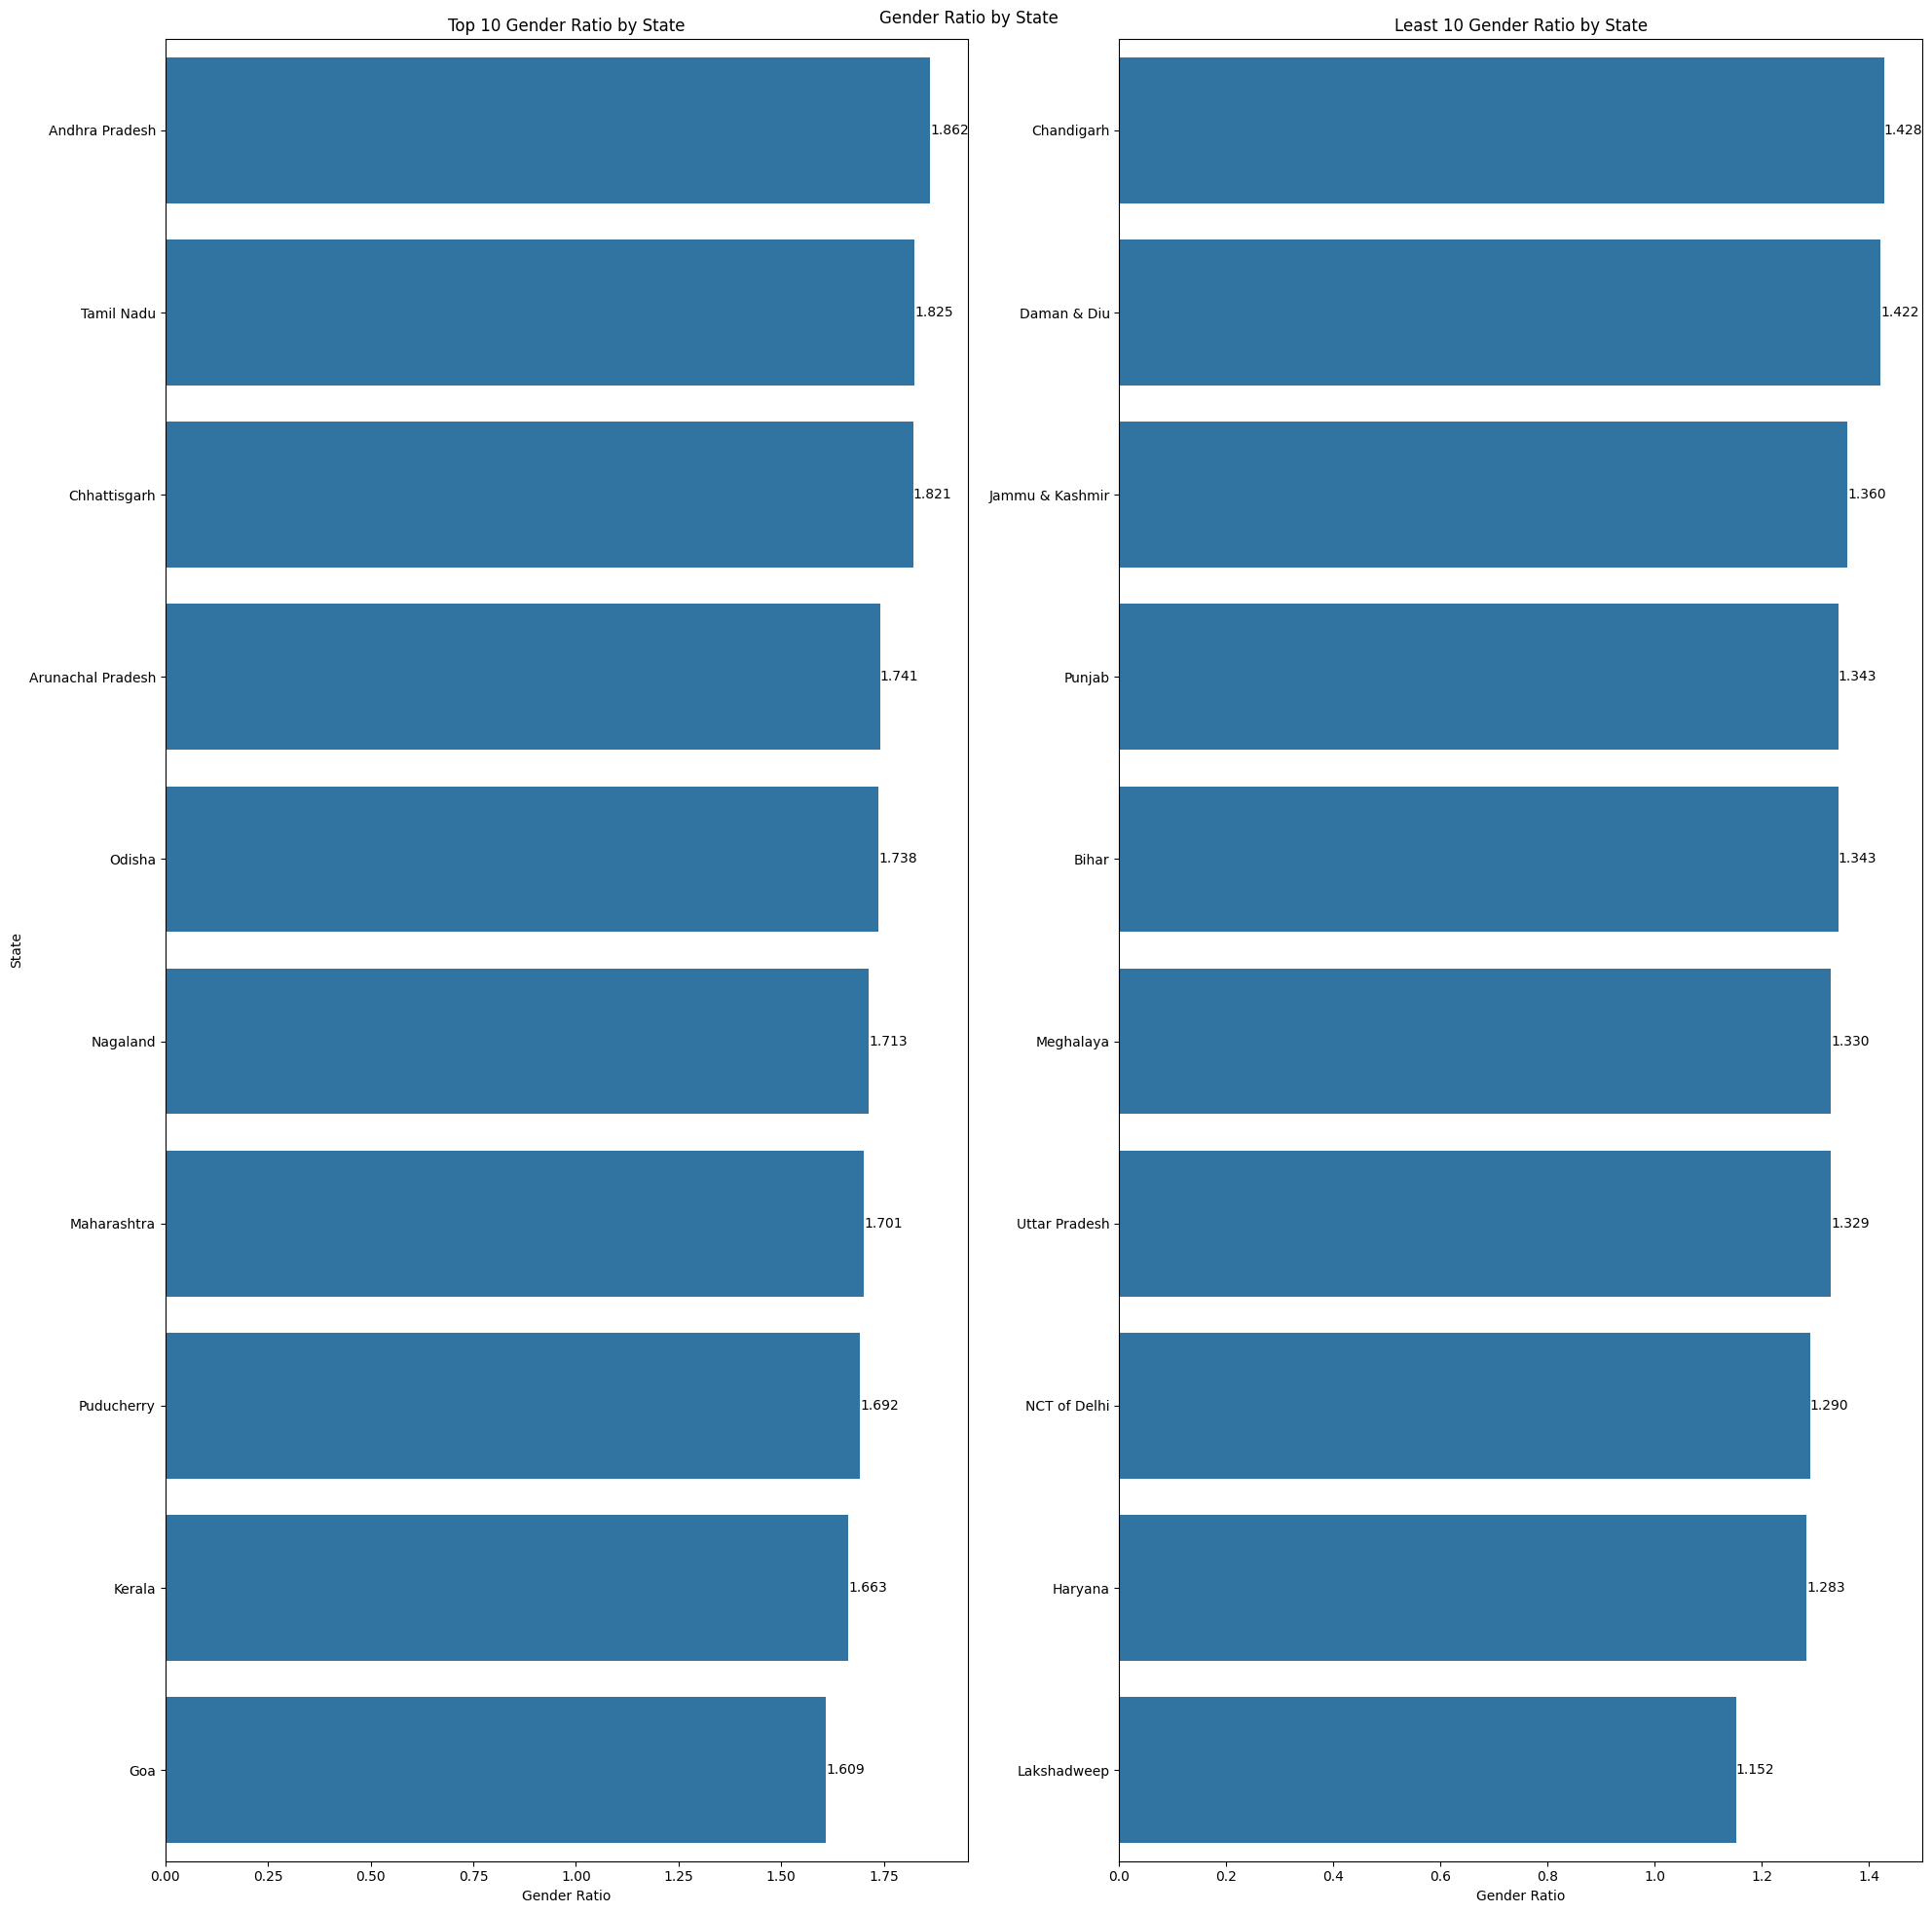

In [40]:
state_male_female_data = eda_data.groupby('State')[['TOT_M','TOT_F']].sum()
state_male_female_data['Gender_Ratio'] = state_male_female_data['TOT_F']/state_male_female_data['TOT_M']
state_male_female_data_sorted = state_male_female_data.sort_values(by='Gender_Ratio', ascending=False)
state_male_female_data_sorted_head =  state_male_female_data_sorted.head(10)
state_male_female_data_sorted_tail =  state_male_female_data_sorted.tail(10)

fig, axes= plt.subplots(nrows=1,ncols=2,figsize=(20,20))
sns.barplot(data=state_male_female_data_sorted_head,x='Gender_Ratio',y=state_male_female_data_sorted_head.index.values,ax=axes[0])
for i in axes[0].containers:
    axes[0].bar_label(i, fmt='%.3f')

axes[0].set_xlabel('Gender Ratio')
axes[0].set_ylabel('State')
axes[0].set_title('Top 10 Gender Ratio by State')

sns.barplot(data=state_male_female_data_sorted_tail,x='Gender_Ratio',y=state_male_female_data_sorted_tail.index.values,ax=axes[1])
for i in axes[1].containers:
    axes[1].bar_label(i, fmt='%.3f')

axes[1].set_xlabel('Gender Ratio')
axes[1].set_title('Least 10 Gender Ratio by State')

fig.suptitle('Gender Ratio by State')
plt.tight_layout()
plt.savefig('./images/cencus_state_GR.svg')
plt.show()


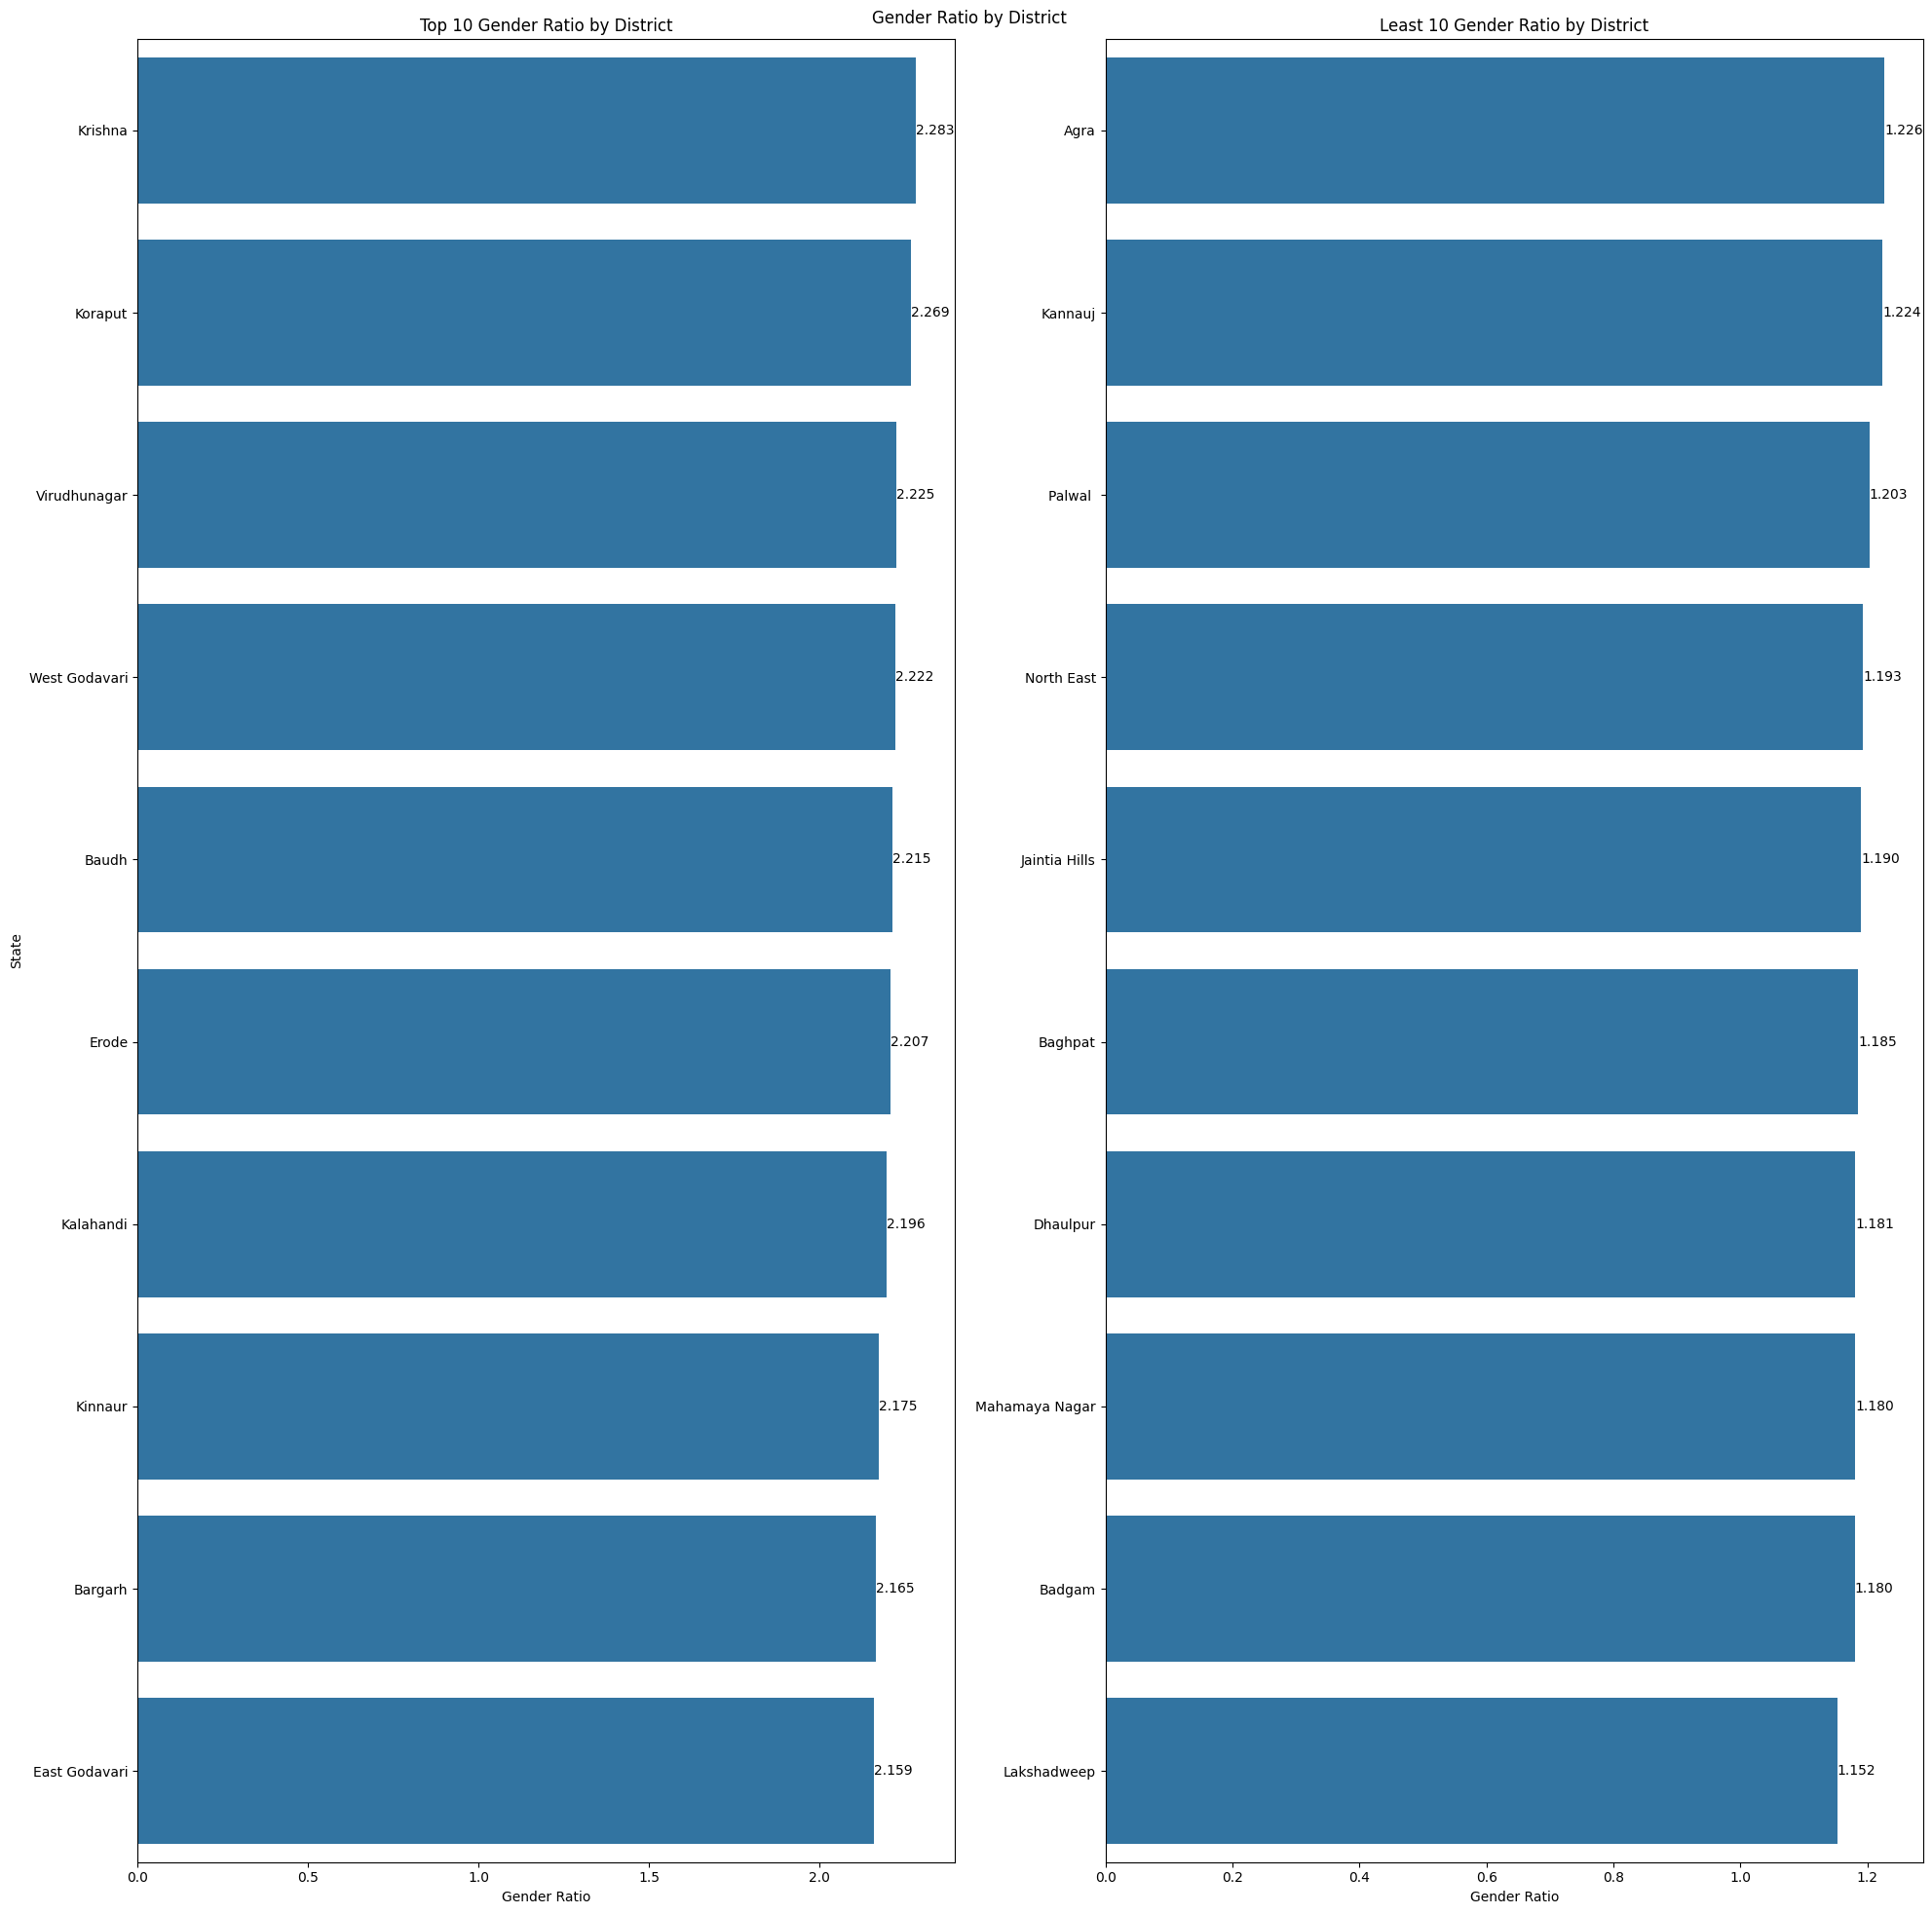

District "['Krishna']" from the State "['Andhra Pradesh']" has the most Gender Ratio.
District "['Lakshadweep']" from the State "['Lakshadweep']" has the least Gender Ratio.


In [44]:
dist_male_female_data = eda_data.groupby('Area Name')[['TOT_M','TOT_F']].sum()
dist_male_female_data['Gender_Ratio'] = dist_male_female_data['TOT_F']/dist_male_female_data['TOT_M']
dist_male_female_data_sorted = dist_male_female_data.sort_values(by='Gender_Ratio', ascending=False)
dist_male_female_data_sorted_head =  dist_male_female_data_sorted.head(10)
dist_male_female_data_sorted_tail =  dist_male_female_data_sorted.tail(10)

fig, axes= plt.subplots(nrows=1,ncols=2,figsize=(20,20))
sns.barplot(data=dist_male_female_data_sorted_head,x='Gender_Ratio',y=dist_male_female_data_sorted_head.index.values,ax=axes[0])
for i in axes[0].containers:
    axes[0].bar_label(i, fmt='%.3f')

axes[0].set_xlabel('Gender Ratio')
axes[0].set_ylabel('State')
axes[0].set_title('Top 10 Gender Ratio by District')

sns.barplot(data=dist_male_female_data_sorted_tail,x='Gender_Ratio',y=dist_male_female_data_sorted_tail.index.values,ax=axes[1])
for i in axes[1].containers:
    axes[1].bar_label(i, fmt='%.3f')

axes[1].set_xlabel('Gender Ratio')
axes[1].set_title('Least 10 Gender Ratio by District')

fig.suptitle('Gender Ratio by District')
plt.tight_layout()
plt.savefig('./images/cencus_dist_GR.svg')
plt.show()

Top_District = eda_data[eda_data['Area Name']=='Krishna'][['State','Area Name']]
Least_District =  eda_data[eda_data['Area Name']=='Lakshadweep'][['State','Area Name']]
print(f'District "{Top_District["Area Name"].values}" from the State "{Top_District["State"].values}" has the most Gender Ratio.')
print(f'District "{Least_District["Area Name"].values}" from the State "{Least_District["State"].values}" has the least Gender Ratio.')


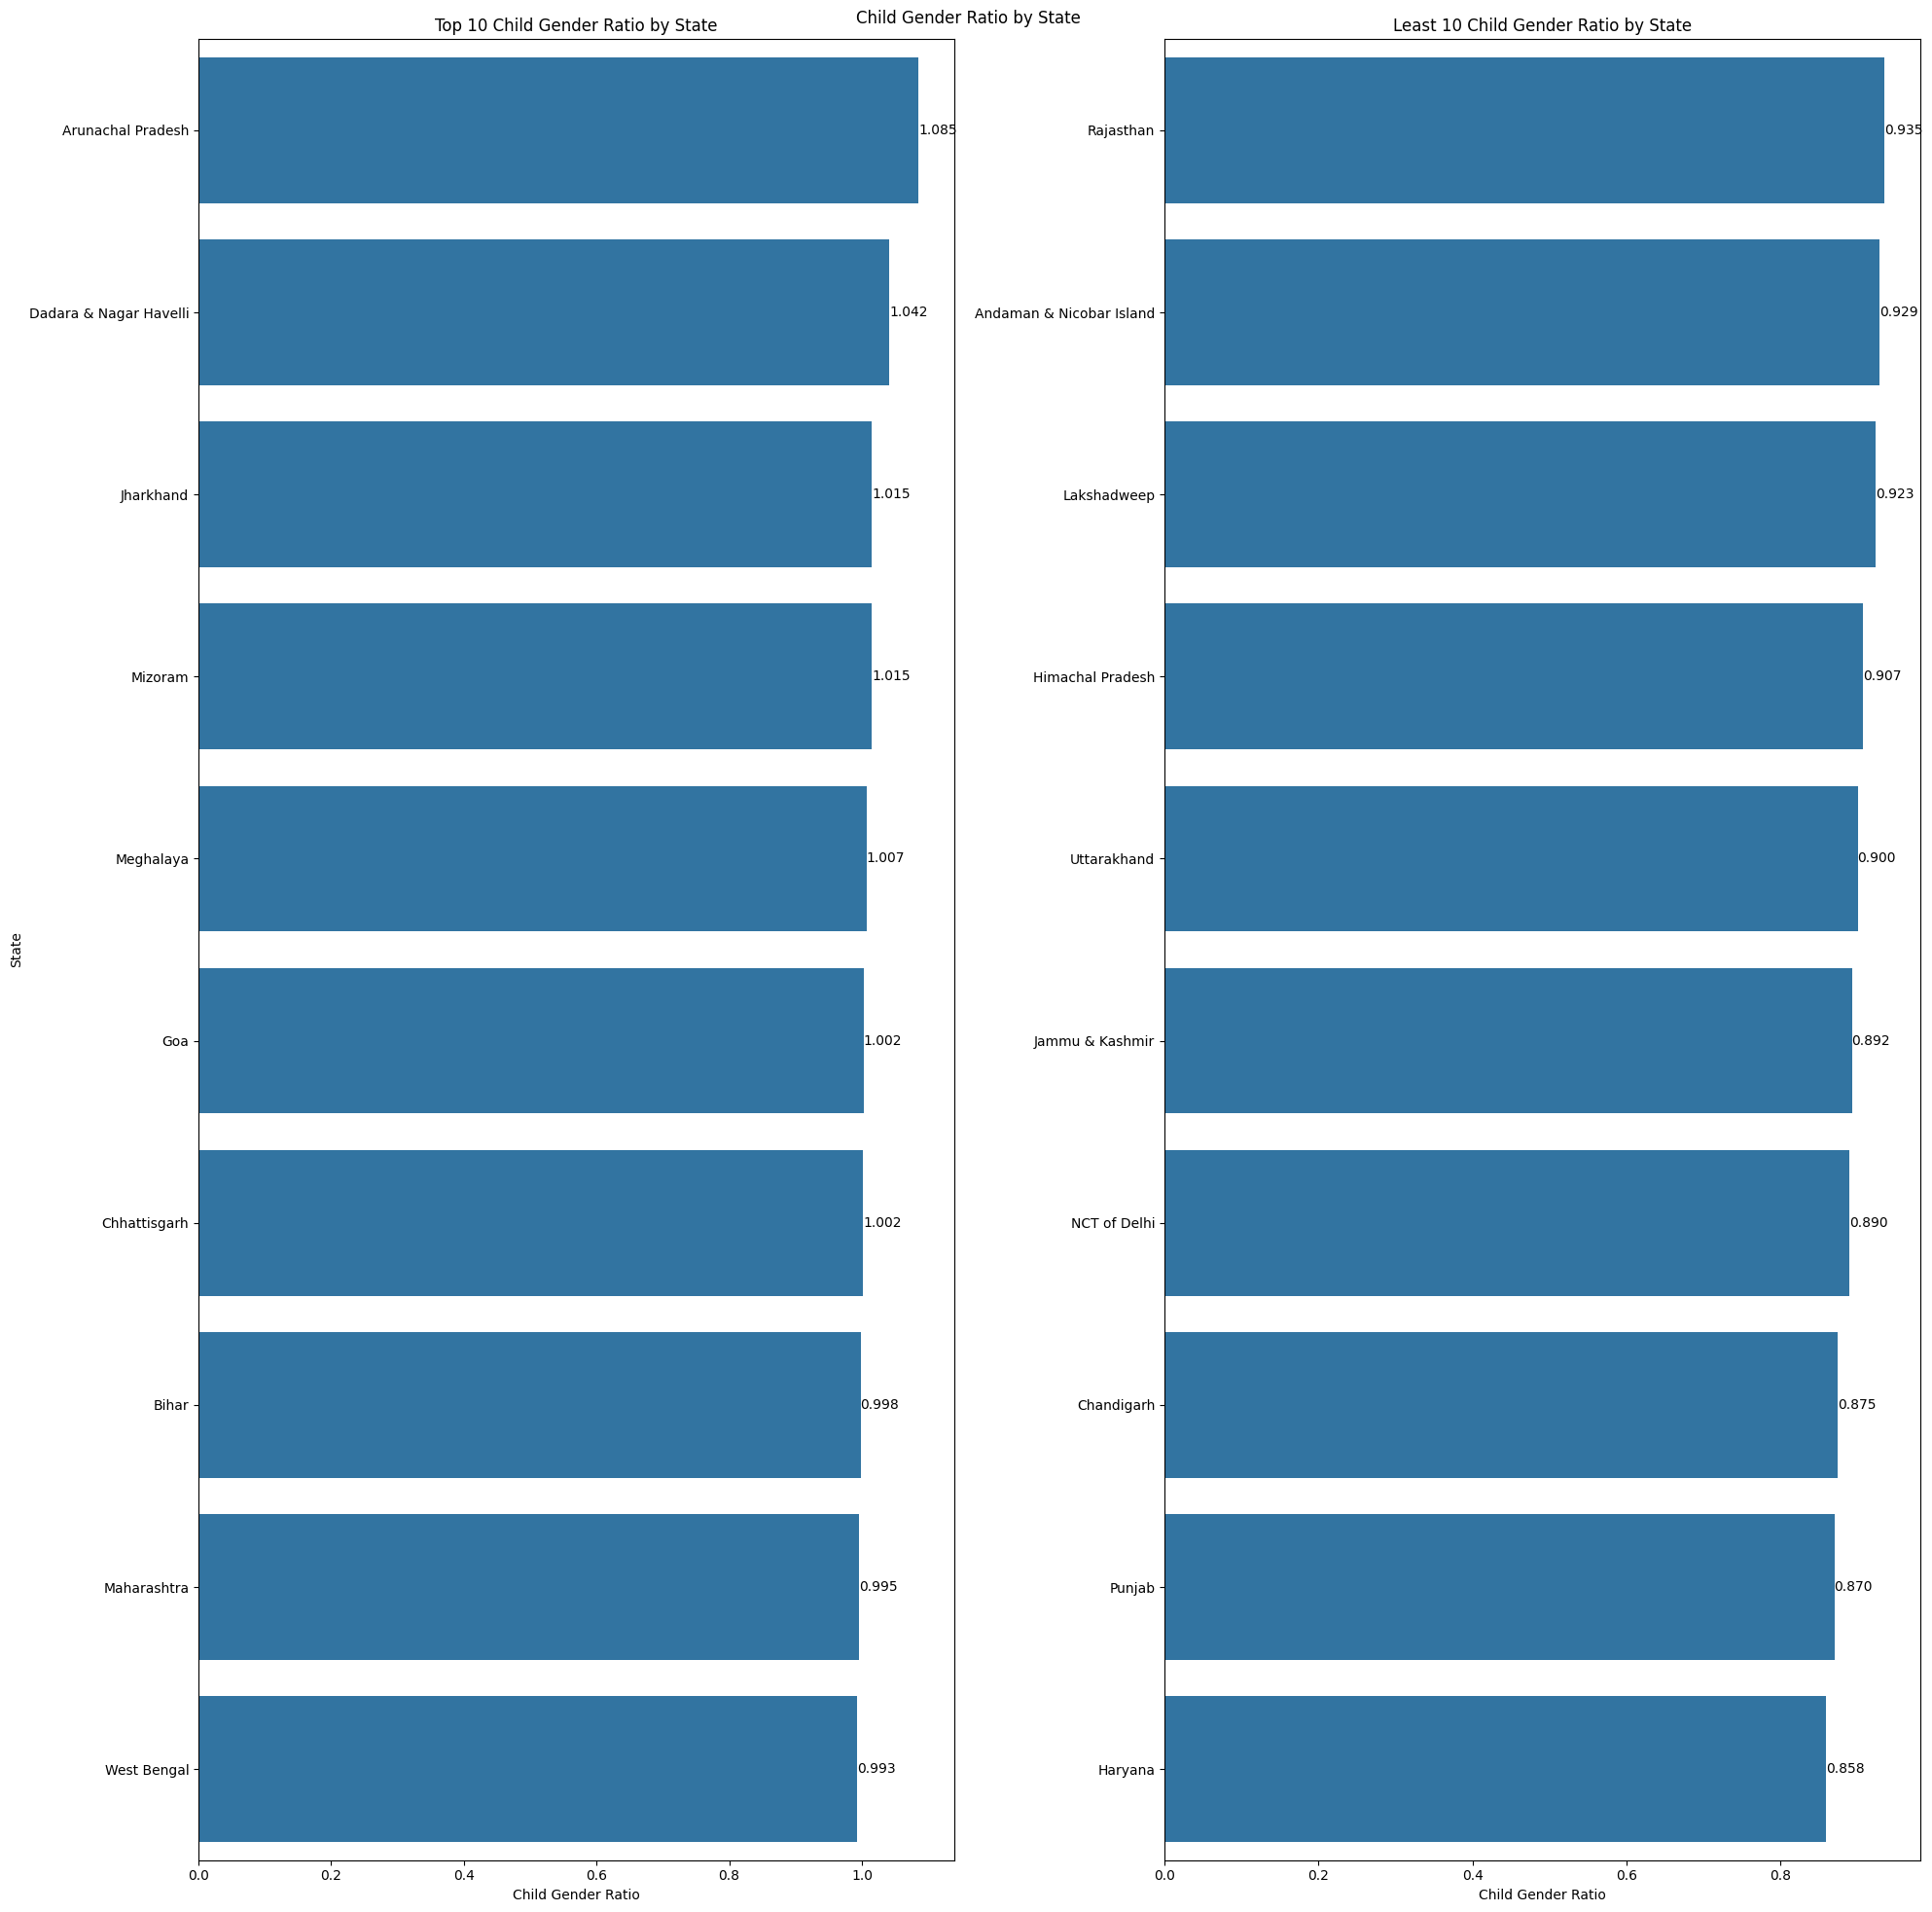

In [45]:
state_child_male_female_data = eda_data.groupby('State')[['M_06','F_06']].sum()
state_child_male_female_data['Child_Gender_Ratio'] = state_child_male_female_data['F_06']/state_child_male_female_data['M_06']
state_child_male_female_data_sorted = state_child_male_female_data.sort_values(by='Child_Gender_Ratio', ascending=False)
state_child_male_female_data_sorted_head =  state_child_male_female_data_sorted.head(10)
state_child_male_female_data_sorted_tail =  state_child_male_female_data_sorted.tail(10)

fig, axes= plt.subplots(nrows=1,ncols=2,figsize=(20,20))
sns.barplot(data=state_child_male_female_data_sorted_head,x='Child_Gender_Ratio',y=state_child_male_female_data_sorted_head.index.values,ax=axes[0])
for i in axes[0].containers:
    axes[0].bar_label(i, fmt='%.3f')

axes[0].set_xlabel('Child Gender Ratio')
axes[0].set_ylabel('State')
axes[0].set_title('Top 10 Child Gender Ratio by State')

sns.barplot(data=state_child_male_female_data_sorted_tail,x='Child_Gender_Ratio',y=state_child_male_female_data_sorted_tail.index.values,ax=axes[1])
for i in axes[1].containers:
    axes[1].bar_label(i, fmt='%.3f')

axes[1].set_xlabel('Child Gender Ratio')
axes[1].set_title('Least 10 Child Gender Ratio by State')

fig.suptitle('Child Gender Ratio by State')
plt.tight_layout()
plt.savefig('./images/cencus_state_CGR.svg')
plt.show()

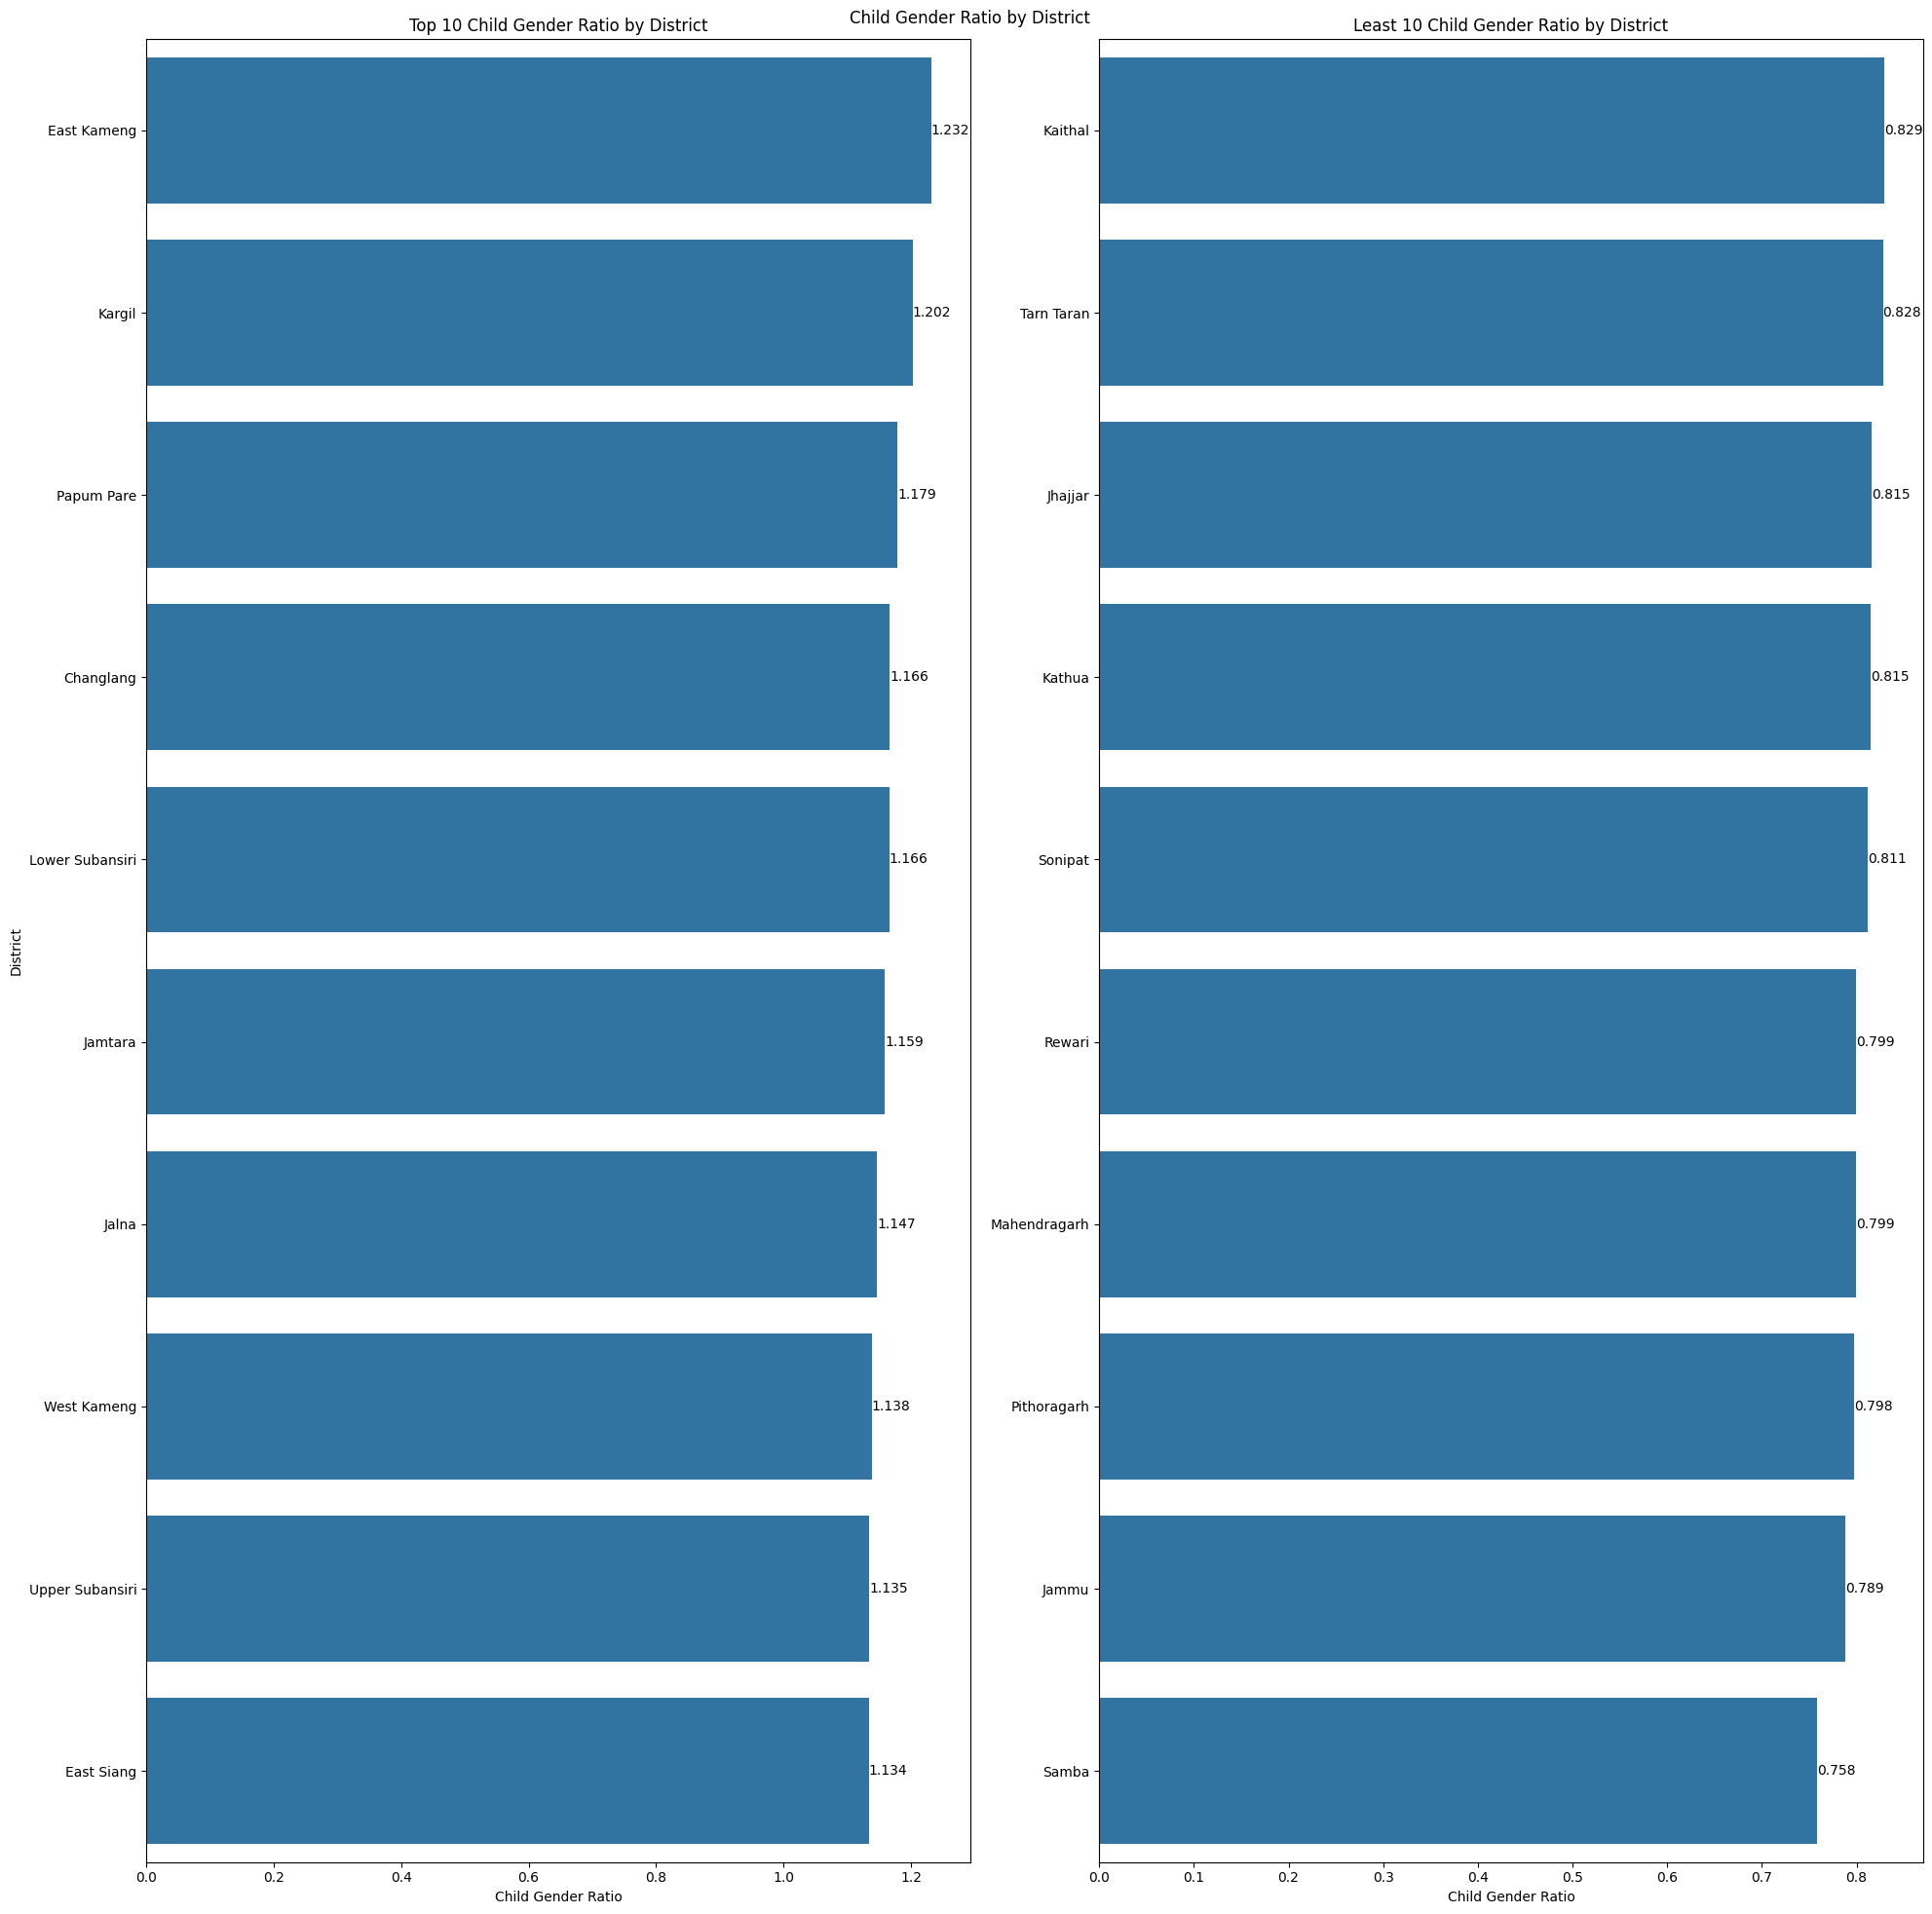

District "['East Kameng']" from the State "['Arunachal Pradesh']" has the most Child Gender Ratio.
District "['Samba']" from the State "['Jammu & Kashmir']" has the least Child Gender Ratio.


In [47]:
dist_child_male_female_data = eda_data.groupby('Area Name')[['M_06','F_06']].sum()
dist_child_male_female_data['Child_Gender_Ratio'] = dist_child_male_female_data['F_06']/dist_child_male_female_data['M_06']
dist_child_male_female_data_sorted = dist_child_male_female_data.sort_values(by='Child_Gender_Ratio', ascending=False)
dist_child_male_female_data_sorted_head =  dist_child_male_female_data_sorted.head(10)
dist_child_male_female_data_sorted_tail =  dist_child_male_female_data_sorted.tail(10)

fig, axes= plt.subplots(nrows=1,ncols=2,figsize=(20,20))
sns.barplot(data=dist_child_male_female_data_sorted_head,x='Child_Gender_Ratio',y=dist_child_male_female_data_sorted_head.index.values,ax=axes[0])
for i in axes[0].containers:
    axes[0].bar_label(i, fmt='%.3f')

axes[0].set_xlabel('Child Gender Ratio')
axes[0].set_ylabel('District')
axes[0].set_title('Top 10 Child Gender Ratio by District')

sns.barplot(data=dist_child_male_female_data_sorted_tail,x='Child_Gender_Ratio',y=dist_child_male_female_data_sorted_tail.index.values,ax=axes[1])
for i in axes[1].containers:
    axes[1].bar_label(i, fmt='%.3f')

axes[1].set_xlabel('Child Gender Ratio')
axes[1].set_title('Least 10 Child Gender Ratio by District')

fig.suptitle('Child Gender Ratio by District')
plt.tight_layout()
plt.savefig('./images/cencus_dist_CGR.svg')
plt.show()
Top_District = eda_data[eda_data['Area Name']=='East Kameng'][['State','Area Name']]
Least_District =  eda_data[eda_data['Area Name']=='Samba'][['State','Area Name']]
print(f'District "{Top_District["Area Name"].values}" from the State "{Top_District["State"].values}" has the most Child Gender Ratio.')
print(f'District "{Least_District["Area Name"].values}" from the State "{Least_District["State"].values}" has the least Child Gender Ratio.')

#### Data Preprocessing
1. Drop the two columns with string values, "State" and "Area Name"
##### Check for and treat (if needed) missing values
1. There is no Missing values in the dataset.
##### Check for and treat (if needed) data irregularities
1. There is no Duplicates
2. Reviewing the data using describe, There are some features wihth min 0 values,but these could be valid entries as could be zero for said features, hence we will not treat these.
##### Visualize the data before and after scaling and comment on the impact on outliers
1. There are outliers for all the features expect State Code and District Code which is expected as State Code and District Code are identifiers rather than counts.
##### Scale the Data using the z-score method
1. We Scale the data using z-score method and plots the box plots again, I have used the Scipy zscore method we can also use the StandarScaler method from Sklearn which does the same scaling operation.
2. There are outliers for all the features expect State Code and District Code which is expected as State Code and District Code are identifiers rather than counts.
3. Scaling does not have an impact on outliers, we still see extreme outliers in the dataset.
4. The data set has outliers and extreme outliers,we cannot remove these as these are not due to data errors, we ideally would explore the following below:***(but would not do the same for this exercise)***
    1. Run transformations like square root, cube root, log, or box-cox etc, to reduce the skew in the data a potientially reduce the ouliers and outlier impact
    2. Post transformation and scaling if outliers/extreme outliers still exists, we would explore techniques like Robust PCA to make sure the impact of the outliers are minimized in the creation of the Principal Components.

In [48]:
# Data Preprocessing to appling PCA
# Remove Odbject type cols
census_data_num = census_data.select_dtypes(exclude=['object'])
census_data_num.info()
census_data_num.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   State Code      640 non-null    int64
 1   Dist.Code       640 non-null    int64
 2   No_HH           640 non-null    int64
 3   TOT_M           640 non-null    int64
 4   TOT_F           640 non-null    int64
 5   M_06            640 non-null    int64
 6   F_06            640 non-null    int64
 7   M_SC            640 non-null    int64
 8   F_SC            640 non-null    int64
 9   M_ST            640 non-null    int64
 10  F_ST            640 non-null    int64
 11  M_LIT           640 non-null    int64
 12  F_LIT           640 non-null    int64
 13  M_ILL           640 non-null    int64
 14  F_ILL           640 non-null    int64
 15  TOT_WORK_M      640 non-null    int64
 16  TOT_WORK_F      640 non-null    int64
 17  MAINWORK_M      640 non-null    int64
 18  MAINWORK_F      640 non-null  

State Code        0
Dist.Code         0
No_HH             0
TOT_M             0
TOT_F             0
M_06              0
F_06              0
M_SC              0
F_SC              0
M_ST              0
F_ST              0
M_LIT             0
F_LIT             0
M_ILL             0
F_ILL             0
TOT_WORK_M        0
TOT_WORK_F        0
MAINWORK_M        0
MAINWORK_F        0
MAIN_CL_M         0
MAIN_CL_F         0
MAIN_AL_M         0
MAIN_AL_F         0
MAIN_HH_M         0
MAIN_HH_F         0
MAIN_OT_M         0
MAIN_OT_F         0
MARGWORK_M        0
MARGWORK_F        0
MARG_CL_M         0
MARG_CL_F         0
MARG_AL_M         0
MARG_AL_F         0
MARG_HH_M         0
MARG_HH_F         0
MARG_OT_M         0
MARG_OT_F         0
MARGWORK_3_6_M    0
MARGWORK_3_6_F    0
MARG_CL_3_6_M     0
MARG_CL_3_6_F     0
MARG_AL_3_6_M     0
MARG_AL_3_6_F     0
MARG_HH_3_6_M     0
MARG_HH_3_6_F     0
MARG_OT_3_6_M     0
MARG_OT_3_6_F     0
MARGWORK_0_3_M    0
MARGWORK_0_3_F    0
MARG_CL_0_3_M     0


In [49]:
census_data_num.duplicated().sum()

0

In [50]:
census_data_num.describe().round(2).T

count       mean        std    min       25%      50%  \
State Code      640.0      17.11       9.43    1.0      9.00     18.0   
Dist.Code       640.0     320.50     184.90    1.0    160.75    320.5   
No_HH           640.0   51222.87   48135.41  350.0  19484.00  35837.0   
TOT_M           640.0   79940.58   73384.51  391.0  30228.00  58339.0   
TOT_F           640.0  122372.08  113600.72  698.0  46517.75  87724.5   
M_06            640.0   12309.10   11500.91   56.0   4733.75   9159.0   
F_06            640.0   11942.30   11326.29   56.0   4672.25   8663.0   
M_SC            640.0   13820.95   14426.37    0.0   3466.25   9591.5   
F_SC            640.0   20778.39   21727.89    0.0   5603.25  13709.0   
M_ST            640.0    6191.81    9912.67    0.0    293.75   2333.5   
F_ST            640.0   10155.64   15875.70    0.0    429.50   3834.5   
M_LIT           640.0   57967.98   55910.28  286.0  21298.00  42693.5   
F_LIT           640.0   66359.57   75037.86  371.0  20932.00  43796.5   
M_ILL           640.0   21972.60   19825.61  105.0   8590.00  15767.5   
F_ILL           640.0   56012.52   47116.69  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.41   36419.54  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.76   37192.36  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.45   31480.92   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.85   29998.26  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.34    4739.16    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.04    5326.36    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.11    6399.51    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8926.00   12864.29    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.89    1278.64    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.77    3179.41    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.10   26068.48   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.04   18972.20  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.96    7410.79   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.91   10996.47  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.74    1311.55    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.68    3564.63    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.33    3781.56    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.28    6773.88    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.74     462.66    0.0     71.75    166.0   
MARG_HH_F       640.0     786.63    1198.72    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.15    3609.39    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.32    4115.19   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.17   39045.32  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.32   82970.41  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.99    6019.81   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.86    8467.47   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.85     905.64    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.58    2496.54    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.64    3059.59    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.85    5335.64    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.36     358.73    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.88     900.03    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.14    3036.96    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.55    3327.84   14.0    833.50   1834.5   
MARG_CL_0_3_M   640.0    1392.97    1489.71    4.0    489.50    949.0   
MARG_CL_0_3_F   640.0    2757.05    2788.78   30.0    957.25   1928.0   
MARG_AL_0_3_M   640.0     250.89     453.34    0.0     47.00    114.5   
MARG_AL_0_3_F   640.0     558.10    1117.64    0.0    109.00    247.5   
MARG_HH_0_3_M   640.0     560.69     762.58    0.0    136.50    308.0   
M

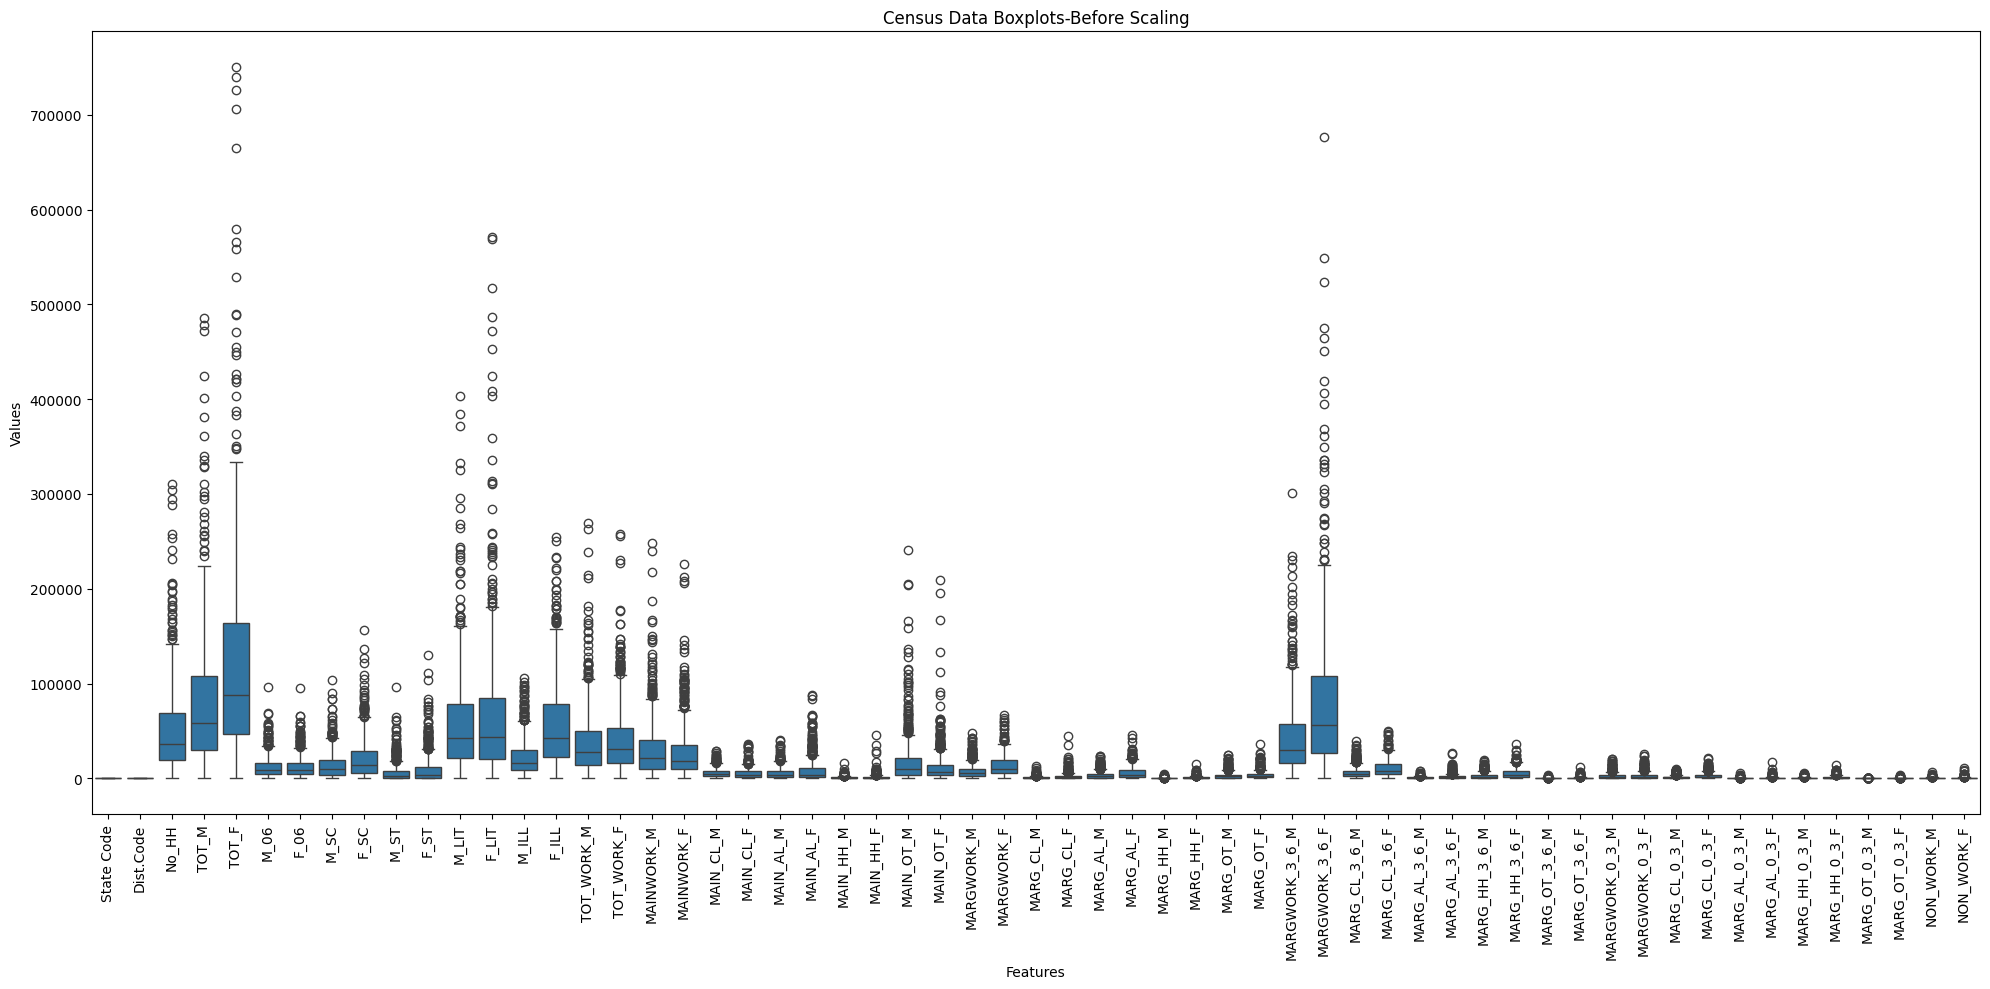

In [51]:
# boxplots before scaling
census_data_num_melt=pd.melt(census_data_num,var_name='Features',value_name='Values')
plt.figure(figsize=(20,10))
sns.boxplot(census_data_num_melt,x='Features',y='Values')
plt.title('Census Data Boxplots-Before Scaling')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('./images/pca_box.svg')
plt.show()

In [52]:
#Scaling all the numercial columns to the same scale using zscore scaling
scaled_census_data_num =zscore(census_data_num)
scaled_census_data_num.describe().round(2).T

count  mean  std   min   25%   50%   75%    max
State Code      640.0   0.0  1.0 -1.71 -0.86  0.09  0.73   1.90
Dist.Code       640.0   0.0  1.0 -1.73 -0.86  0.00  0.86   1.73
No_HH           640.0   0.0  1.0 -1.06 -0.66 -0.32  0.37   5.39
TOT_M           640.0  -0.0  1.0 -1.08 -0.68 -0.29  0.38   5.53
TOT_F           640.0  -0.0  1.0 -1.07 -0.67 -0.31  0.37   5.53
M_06            640.0  -0.0  1.0 -1.07 -0.66 -0.27  0.37   7.30
F_06            640.0   0.0  1.0 -1.05 -0.64 -0.29  0.35   7.35
M_SC            640.0   0.0  1.0 -0.96 -0.72 -0.29  0.39   6.21
F_SC            640.0  -0.0  1.0 -0.96 -0.70 -0.33  0.39   6.25
M_ST            640.0  -0.0  1.0 -0.63 -0.60 -0.39  0.15   9.15
F_ST            640.0  -0.0  1.0 -0.64 -0.61 -0.40  0.15   7.56
M_LIT           640.0  -0.0  1.0 -1.03 -0.66 -0.27  0.36   6.18
F_LIT           640.0   0.0  1.0 -0.88 -0.61 -0.30  0.25   6.73
M_ILL           640.0   0.0  1.0 -1.10 -0.68 -0.31  0.38   4.24
F_ILL           640.0  -0.0  1.0 -1.18 -0.71 -0.29  0.48   4.21
TOT_WORK_M      640.0  -0.0  1.0 -1.04 -0.67 -0.28  0.34   6.36
TOT_WORK_F      640.0  -0.0  1.0 -1.10 -0.68 -0.29  0.32   5.83
MAINWORK_M      640.0  -0.0  1.0 -0.96 -0.65 -0.28  0.32   6.92
MAINWORK_F      640.0   0.0  1.0 -0.93 -0.62 -0.32  0.23   6.60
MAIN_CL_M       640.0  -0.0  1.0 -1.15 -0.72 -0.27  0.48   5.00
MAIN_CL_F       640.0  -0.0  1.0 -1.03 -0.67 -0.30  0.34   5.77
MAIN_AL_M       640.0   0.0  1.0 -0.91 -0.75 -0.30  0.35   5.47
MAIN_AL_F       640.0   0.0  1.0 -0.69 -0.58 -0.39  0.13   6.15
MAIN_HH_M       640.0   0.0  1.0 -0.69 -0.55 -0.30  0.17  12.17
MAIN_HH_F       640.0   0.0  1.0 -0.43 -0.36 -0.26  0.02  14.04
MAIN_OT_M       640.0   0.0  1.0 -0.69 -0.54 -0.32  0.12   8.55
MAIN_OT_F       640.0  -0.0  1.0 -0.65 -0.49 -0.32  0.10  10.39
MARGWORK_M      640.0  -0.0  1.0 -1.05 -0.66 -0.29  0.27   5.37
MARGWORK_F      640.0   0.0  1.0 -1.18 -0.70 -0.27  0.53   4.90
MARG_CL_M       640.0   0.0  1.0 -0.79 -0.56 -0.33  0.18   9.28
MARG_CL_F       640.0  -0.0  1.0 -0.65 -0.47 -0.30  0.10  11.80
MARG_AL_M       640.0   0.0  1.0 -0.87 -0.64 -0.33  0.26   5.40
MARG_AL_F       640.0   0.0  1.0 -0.95 -0.75 -0.36  0.39   5.74
MARG_HH_M       640.0  -0.0  1.0 -0.69 -0.53 -0.33  0.09   8.61
MARG_HH_F       640.0   0.0  1.0 -0.66 -0.51 -0.30  0.15  12.24
MARG_OT_M       640.0   0.0  1.0 -0.86 -0.61 -0.30  0.24   5.99
MARG_OT_F       640.0  -0.0  1.0 -0.86 -0.60 -0.29  0.21   7.99
MARGWORK_3_6_M  640.0   0.0  1.0 -1.07 -0.66 -0.30  0.39   6.64
MARGWORK_3_6_F  640.0  -0.0  1.0 -0.97 -0.66 -0.29  0.32   7.18
MARG_CL_3_6_M   640.0  -0.0  1.0 -1.06 -0.67 -0.29  0.29   5.44
MARG_CL_3_6_F   640.0  -0.0  1.0 -1.21 -0.71 -0.24  0.56   4.70
MARG_AL_3_6_M   640.0  -0.0  1.0 -0.87 -0.61 -0.34  0.22   7.33
MARG_AL_3_6_F   640.0   0.0  1.0 -0.70 -0.50 -0.31  0.12  10.19
MARG_HH_3_6_M   640.0  -0.0  1.0 -0.90 -0.66 -0.34  0.31   5.43
MARG_HH_3_6_F   640.0  -0.0  1.0 -0.97 -0.76 -0.35  0.44   5.83
MARG_OT_3_6_M   640.0  -0.0  1.0 -0.68 -0.52 -0.32  0.09   9.18
MARG_OT_3_6_F   640.0   0.0  1.0 -0.65 -0.51 -0.30  0.15  12.80
MARGWORK_0_3_M  640.0   0.0  1.0 -0.86 -0.61 -0.31  0.23   5.94
MARGWORK_0_3_F  640.0   0.0  1.0 -0.85 -0.60 -0.30  0.23   6.92
MARG_CL_0_3_M   640.0  -0.0  1.0 -0.93 -0.61 -0.30  0.22   5.70
MARG_CL_0_3_F   640.0  -0.0  1.0 -0.98 -0.65 -0.30  0.30   6.77
MARG_AL_0_3_M   640.0   0.0  1.0 -0.55 -0.45 -0.30  0.04  12.19
MARG_AL_0_3_F   640.0  -0.0  1.0 -0.50 -0.40 -0.28  0.01  14.86
MARG_HH_0_3_M   640.0   0.0  1.0 -0.74 -0.56 -0.33  0.11   7.29
MARG_HH_0_3_F   640.0  -0.0  1.0 -0.82 -0.63 -0.36  0.26   7.84
MARG_OT_0_3_M   640.0  -0.0  1.0 -0.66 -0.53 -0.34  0.07   7.64
MARG_OT_0_3_F   640.0   0.0  1.0 -0.65 -0.51 -0.28  0.13  10.19
NON_WORK_M      640.0  -0.0  1.0 -0.84 -0.57 -0.30  0.15   9.75
NON_WORK_F      640.0  -0.0  1.0 -0.77 -0.53 -0.26  0.16  10.81

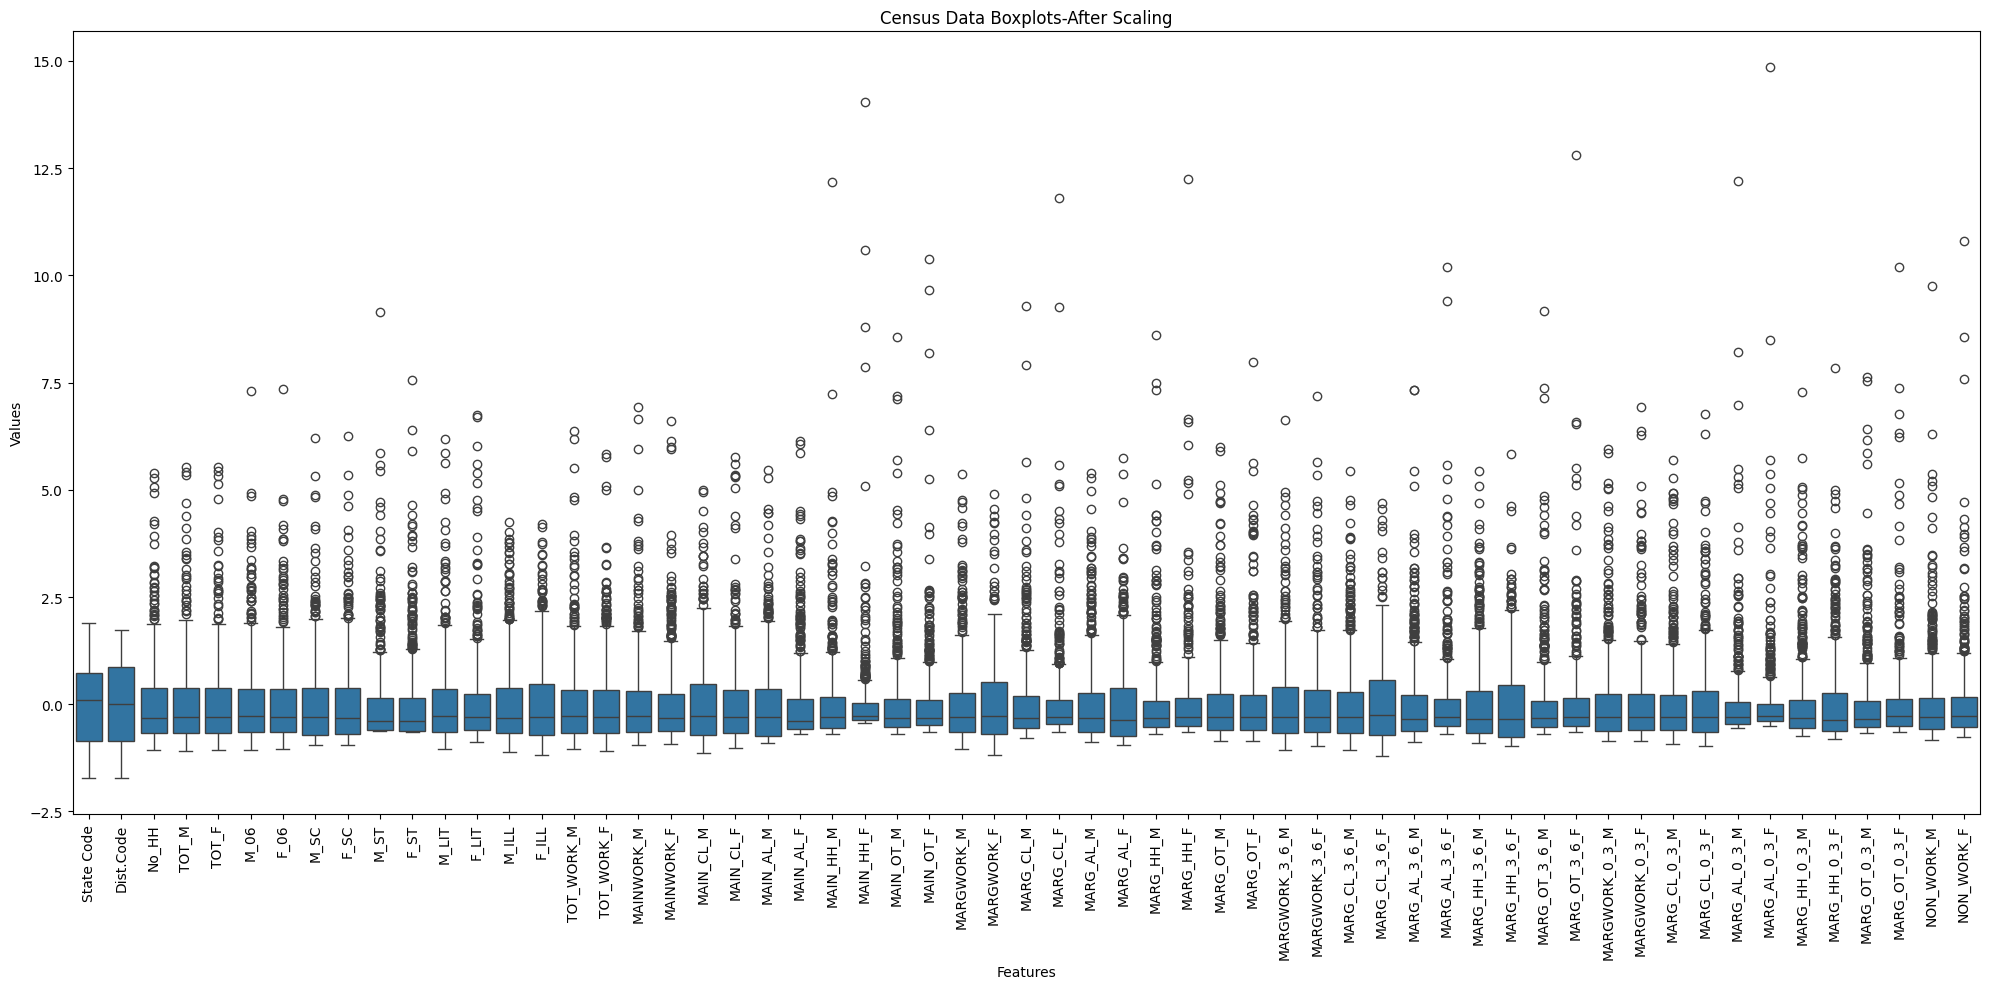

In [53]:
# boxplots after scaling
scaled_census_data_num_melt=pd.melt(scaled_census_data_num,var_name='Features',value_name='Values')
plt.figure(figsize=(20,10))
sns.boxplot(scaled_census_data_num_melt,x='Features',y='Values')
plt.title('Census Data Boxplots-After Scaling')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('./images/pca_box_scaled.svg')
plt.show()

In [54]:
scaled_census_data_num.head()

State Code  Dist.Code     No_HH     TOT_M     TOT_F      M_06      F_06  \
0   -1.710782  -1.729347 -0.904738 -0.771236 -0.815563 -0.561012 -0.507738   
1   -1.710782  -1.723934 -0.935695 -0.823100 -0.874534 -0.681096 -0.725367   
2   -1.710782  -1.718521 -0.972412 -1.000919 -0.981466 -0.976956 -0.965262   
3   -1.710782  -1.713109 -1.037530 -1.052224 -1.041001 -1.022118 -0.995393   
4   -1.710782  -1.707696 -0.822676 -0.809381 -0.813933 -0.622359 -0.649908   

       M_SC      F_SC      M_ST  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -0.958575 -0.957049 -0.423306  ...      -0.163229      -0.720610   
1 -0.958297 -0.956772 -0.582014  ...      -0.583103      -0.732811   
2 -0.958575 -0.956772 -0.038951  ...      -0.859212      -0.921931   
3 -0.958783 -0.957049 -0.355965  ...      -0.805468      -0.900758   
4 -0.957395 -0.955529  0.149238  ...      -0.348645      -0.297513   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.156494      -0.287524       0.156577      -0.657412      -0.365258   
1      -0.282327      -0.294688      -0.491731      -0.723062       0.042855   
2      -0.456727      -0.420050      -0.731894      -0.795026      -0.662068   
3      -0.419198      -0.385127      -0.718770      -0.784926      -0.624966   
4       0.472670       0.434200      -0.466796      -0.625849      -0.439461   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.499977   -0.413053   -0.539614  
1      -0.073481   -0.606455   -0.598988  
2      -0.635680   -0.726103   -0.707839  
3      -0.616294   -0.645791   -0.710038  
4      -0.309346   -0.540895   -0.249344  

[5 rows x 59 columns]

#### PCA
Note: For the scope of this project, take at least 90% explained variance.
##### Create the covariance matrix
Creating the covariance matrix using the cov() method, and plotting the same in a heatmap, we see that there are lot of instances where the value of the covariance is larger than 0.8.
This indicates that there is alot of covariance between the features and the dataset is a good candidate for PCA.
##### Get eigen values and eigen vectors
Using the PCA method of the SKlearn package we can get the eigen values (explained_variance_), the eigen vectors (components_) and the eigen values ratios (explained_variance_ratio_) 
##### Identify the optimum number of PCs
We take the theshold of 90% explained variance or .90 as the threshold to get the number of PCs whic are Optimal, from the cumalative explained variance ratio we set this treshold and count the numbers of PCs below or equal to this threshold, we get a value of 6, which means that the 1st six PCs explain the variance in the data to a theashold of 90%.
#####  Show Scree plot 
Ploting the Scree Plot and specifically the Cumalative Scree Plot we see if we cut of the graph at 0.90 on the y axis we have 6 PCs which would get us close to this.
##### Compare PCs with Actual Columns and identify which is explaining most variance
1. Plotted the Heat map of the loadings for the Actual Columns(Feature) vs frist 6 PCs, this gives us visibility to the influence of the feature within a PC, higher the magnitude more the influence, the sign lets us know if its a positive influence or negative.
2. Plotted for each of the first 6 PC's the square of the loadings (tells us the contribution to variance) for the actual columns(features), this shows us for each PC, what is the features and what is they contribution in explaining the variance with in the PC, we only looked at features which explained ~0.90 or ~90% of the variance within the PC.
3. The list of the features explaining most of the variance in each of the 6 PCs are:
    1. The feature explaining most that the variance for PC1 is, TOT_M, it expains 2.79% of the variance in PC1.
    2. The feature explaining most that the variance for PC2 is, MARG_CL_M, it expains 7.29% of the variance in PC2.
    3. The feature explaining most that the variance for PC3 is, MAIN_AL_F, it expains 9.83% of the variance in PC3.
    4. The feature explaining most that the variance for PC4 is, MARG_AL_3_6_F, it expains 8.36% of the variance in PC4.
    5. The feature explaining most that the variance for PC5 is, F_ST, it expains 14.3% of the variance in PC5.
    6. The feature explaining most that the variance for PC6 is, MAIN_HH_F, it expains 18.95% of the variance in PC6.


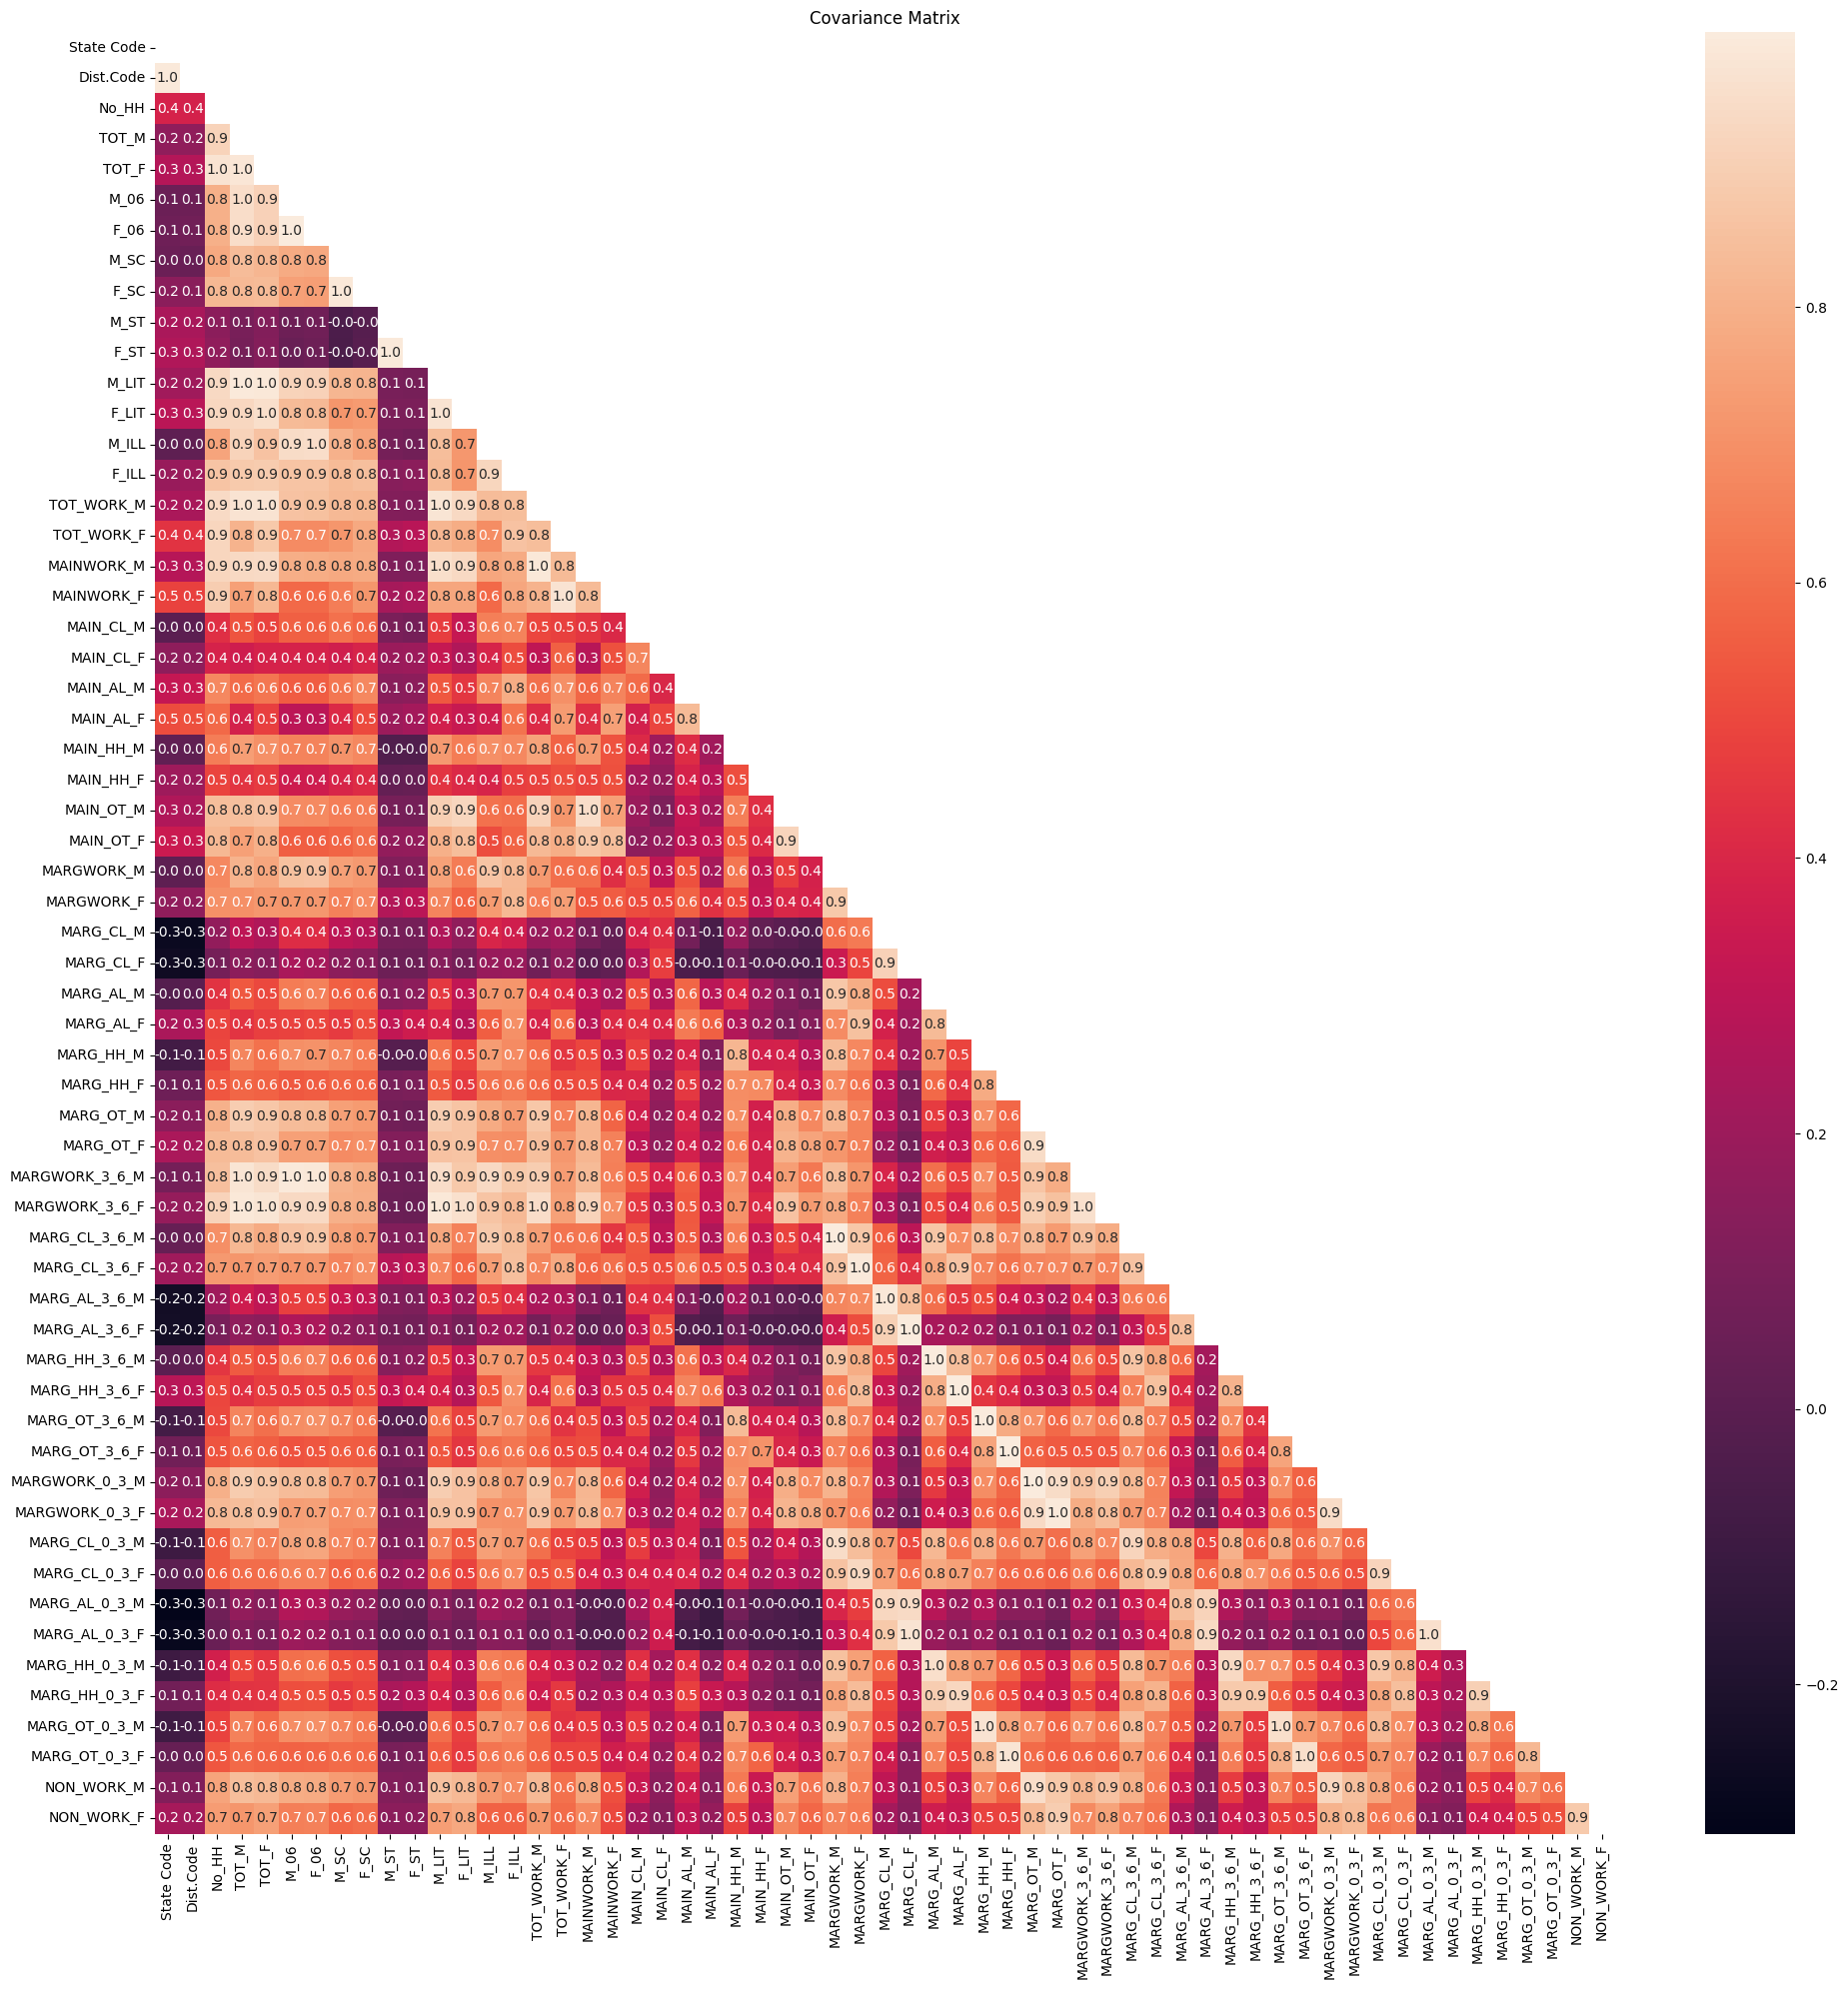

In [55]:
covMatrix = scaled_census_data_num.cov()
matrix = np.triu(covMatrix)
plt.figure(figsize=(20, 20))
sns.heatmap(covMatrix, annot=True, fmt='.1f',mask=matrix)
plt.title('Covariance Matrix')
plt.tight_layout()
plt.savefig('./images/pca_cov.svg')
plt.show()

In [56]:
#PCA get the eigen values and the eigenvectors
pca = PCA(n_components=scaled_census_data_num.shape[1])
pca.fit(scaled_census_data_num)
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
egenvaluesratio = pca.explained_variance_ratio_
egenvaluesratio_cumulative = pca.explained_variance_ratio_.cumsum()

#Get the Optiminum Number of PCS
threshold = 0.90
mask = egenvaluesratio_cumulative <= threshold
optimum_pcs = egenvaluesratio_cumulative[mask]
print(f'The number of optimum PCs is {len(optimum_pcs)}')


The number of optimum PCs is 6


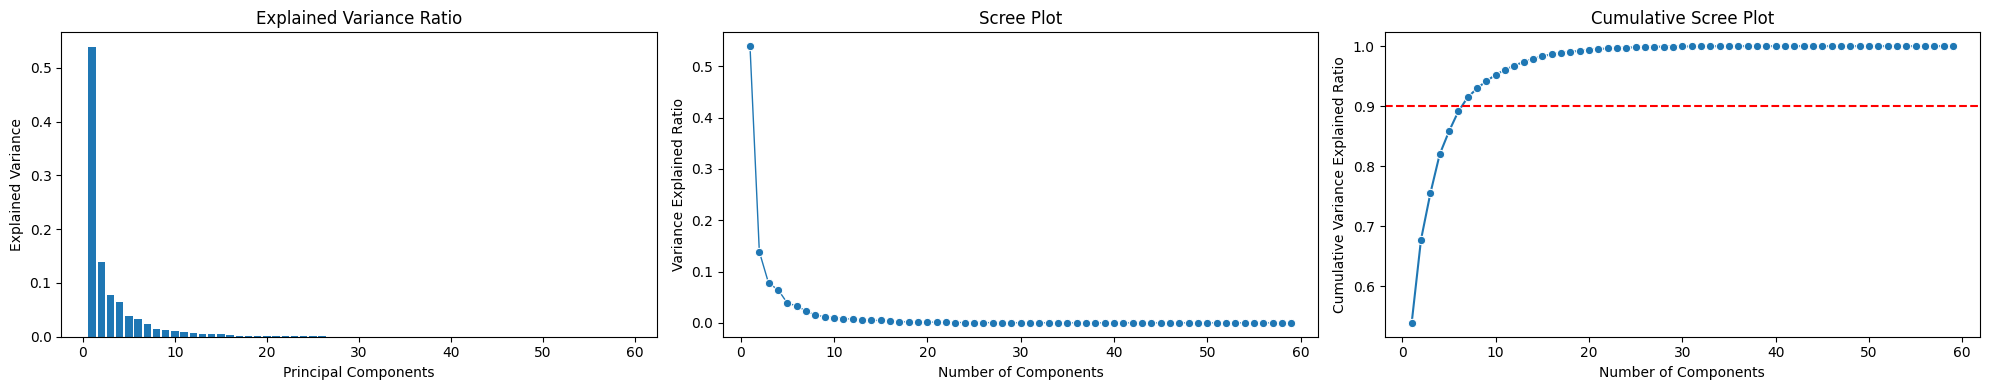

The number of optimum PCs whicn explains ~90% of the variance is 6.


In [57]:
#Plotting the PCA Feature Explained, Scree and Cumalitive Scree Plots

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,4))


ax[0].bar(range(1, 60), pca.explained_variance_ratio_)
ax[0].set_ylabel('Explained Variance')
ax[0].set_xlabel('Principal Components')
ax[0].set_title('Explained Variance Ratio')


sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,60),marker='o',linewidth=1,ax=ax[1])
ax[1].set_xlabel('Number of Components')
ax[1].set_ylabel('Variance Explained Ratio')
ax[1].set_title('Scree Plot')

#get the cummerlative variance ratio:
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
cum_ratio

sns.lineplot(y=cum_ratio ,x=range(1,60),marker='o',ax=ax[2])
ax[2].set_xlabel('Number of Components')
ax[2].set_ylabel('Cumulative Variance Explained Ratio')
ax[2].set_title('Cumulative Scree Plot')
ax[2].axhline(y=0.9, color='r', linestyle='--')

plt.tight_layout()
plt.savefig('./images/pca_scree_plots.svg')
plt.show()
print(f'The number of optimum PCs whicn explains ~90% of the variance is {len(optimum_pcs)}.')

In [58]:
# We will concentrate on the frist 6 Principal Components as they explain ~90% of the variance 
# Get the eigenvectors and label them to the corresponding columns of the data.
pc_labels =['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
            'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
            'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
            'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
            'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50',
            'PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59'
           ] 
loadings_actual_features = pd.DataFrame(eigenvectors.T,columns=pc_labels,index=scaled_census_data_num.columns)
first_6_component_loadings= loadings_actual_features.iloc[:,:6]
first_3_component_loadings = first_6_component_loadings.iloc[:,:3]
first_6_component_loadings

PC1       PC2       PC3       PC4       PC5       PC6
State Code      0.030070 -0.162783  0.250129  0.120049  0.145753  0.090244
Dist.Code       0.030075 -0.158822  0.259360  0.110852  0.136167  0.079450
No_HH           0.156432 -0.128322  0.033498  0.101335 -0.022504 -0.000996
TOT_M           0.167038 -0.080861 -0.063630  0.033299 -0.049227 -0.074100
TOT_F           0.165702 -0.101111 -0.024403  0.071948 -0.027928 -0.046350
M_06            0.161871 -0.012753 -0.070453  0.007703 -0.069415 -0.152284
F_06            0.162266 -0.011674 -0.063515  0.002417 -0.062113 -0.149228
M_SC            0.151068 -0.035627 -0.035345 -0.024603 -0.185394 -0.045912
F_SC            0.151483 -0.047732  0.009677  0.002284 -0.170823 -0.022720
M_ST            0.027664  0.008893  0.201756  0.142128  0.372538  0.110757
F_ST            0.028656  0.009765  0.220129  0.141942  0.378134  0.113572
M_LIT           0.162029 -0.106709 -0.078097  0.059904 -0.020783 -0.057182
F_LIT           0.147118 -0.145649 -0.094215  0.100907  0.048630 -0.054350
M_ILL           0.161355  0.001625 -0.015287 -0.045680 -0.123602 -0.113020
F_ILL           0.165216 -0.011822  0.091208  0.012765 -0.144783 -0.025193
TOT_WORK_M      0.159989 -0.126024 -0.049175  0.045020 -0.032683 -0.007646
TOT_WORK_F      0.146485 -0.096165  0.126155  0.163411 -0.059847  0.095055
MAINWORK_M      0.146447 -0.168329 -0.053223  0.070774 -0.052703  0.012353
MAINWORK_F      0.124701 -0.161039  0.119314  0.178748 -0.105471  0.115437
MAIN_CL_M       0.102842  0.060784  0.073732  0.033137 -0.309091  0.013372
MAIN_CL_F       0.074639  0.072382  0.121925  0.243959 -0.256183  0.118601
MAIN_AL_M       0.113762 -0.045072  0.241982 -0.009802 -0.244210 -0.021674
MAIN_AL_F       0.074787 -0.083782  0.313531  0.127309 -0.218172  0.024647
MAIN_HH_M       0.131280 -0.061292 -0.102102 -0.129012 -0.101784  0.191305
MAIN_HH_F       0.083602 -0.081797  0.024900 -0.072407 -0.087854  0.435306
MAIN_OT_M       0.123790 -0.200258 -0.132074  0.088178  0.057489  0.008424
MAIN_OT_F       0.111499 -0.204434 -0.062340  0.139951  0.067811  0.059567
MARGWORK_M      0.164144  0.095729 -0.015572 -0.079401  0.063268 -0.090051
MARGWORK_F      0.155259  0.114062  0.101195  0.065070  0.085309  0.006585
MARG_CL_M       0.081470  0.270006 -0.104666  0.162308  0.003914  0.046110
MARG_CL_F       0.048411  0.245991 -0.125646  0.285792 -0.030845  0.108823
MARG_AL_M       0.128167  0.158405  0.142069 -0.163558  0.001840 -0.142828
MARG_AL_F       0.114462  0.117725  0.290271 -0.024294  0.043303 -0.104573
MARG_HH_M       0.140274  0.077559 -0.064858 -0.212713 -0.017314  0.110801
MARG_HH_F       0.127424  0.027744  0.004157 -0.202932  0.026272  0.371880
MARG_OT_M       0.155155 -0.077464 -0.134472 -0.023379  0.128771 -0.066210
MARG_OT_F       0.147414 -0.110153 -0.099771  0.025422  0.175746 -0.012857
MARGWORK_3_6_M  0.164714 -0.034426 -0.073724  0.020593 -0.062035 -0.132136
MARGWORK_3_6_F  0.161211 -0.095331 -0.089963  0.025258 -0.011411 -0.106070
MARG_CL_3_6_M   0.165090  0.079613 -0.005016 -0.087699  0.054687 -0.096012
MARG_CL_3_6_F   0.155618  0.090678  0.123580  0.069215  0.064538  0.011578
MARG_AL_3_6_M   0.092133  0.263962 -0.076698  0.119702  0.013845  0.024471
MARG_AL_3_6_F   0.050781  0.242794 -0.111763  0.289092 -0.036385  0.108764
MARG_HH_3_6_M   0.128189  0.150601  0.153496 -0.159301 -0.011560 -0.144891
MARG_HH_3_6_F   0.110911  0.100312  0.309744 -0.005055  0.023618 -0.096166
MARG_OT_3_6_M   0.139029  0.071923 -0.066194 -0.212570 -0.022944  0.118916
MARG_OT_3_6_F   0.124331  0.018344  0.004905 -0.198779  0.015909  0.391537
MARGWORK_0_3_M  0.154197 -0.081126 -0.133891 -0.023934  0.118628 -0.065687
MARGWORK_0_3_F  0.146412 -0.117213 -0.099662  0.021101  0.149339 -0.003843
MARG_CL_0_3_M   0.149445  0.154508 -0.057198 -0.040609  0.093749 -0.059995
MARG_CL_0_3_F   0.139705  0.174434  0.023800  0.046423  0.140430 -0.009186
MARG_AL_0_3_M   0.051646  0.253834 -0.149589  0.230440 -0.016334  0.084513
MARG_AL_0_3_F   0.040969  0.242224 -0.151083  

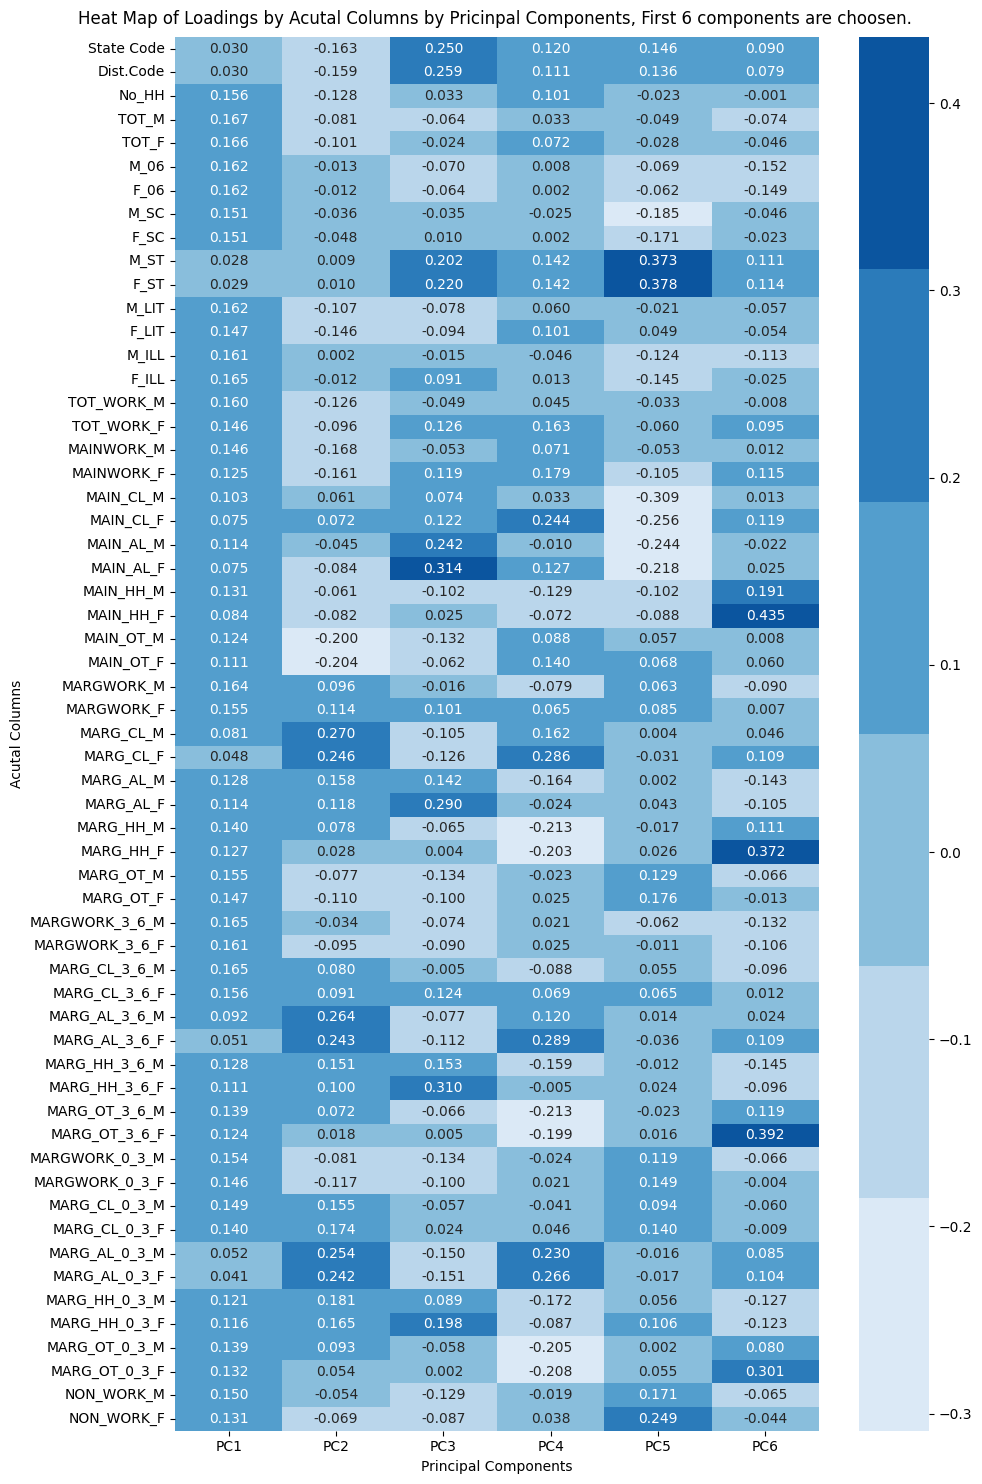

In [59]:
#heatmap for the 1st 6 PC loadings/eigen vectors by Actual columns(Features) vs PCs
plt.figure(figsize=(10,15))
colormap = sns.color_palette("Blues")
sns.heatmap(first_6_component_loadings,annot=True, fmt='.3F', cmap=colormap)
plt.suptitle('Heat Map of Loadings by Acutal Columns by Pricinpal Components, First 6 components are choosen.',ha='center',va='center')
plt.ylabel('Acutal Columns')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.savefig('./images/pca_feature_heatmap.svg')
plt.show()

C:\Users\kurtg\AppData\Local\Temp\ipykernel_20604\1275678277.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=8)
C:\Users\kurtg\AppData\Local\Temp\ipykernel_20604\1275678277.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=8)
C:\Users\kurtg\AppData\Local\Temp\ipykernel_20604\1275678277.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=8)
C:\Users\kurtg\AppData\Local\Temp\ipykernel_20604\1275678277.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes

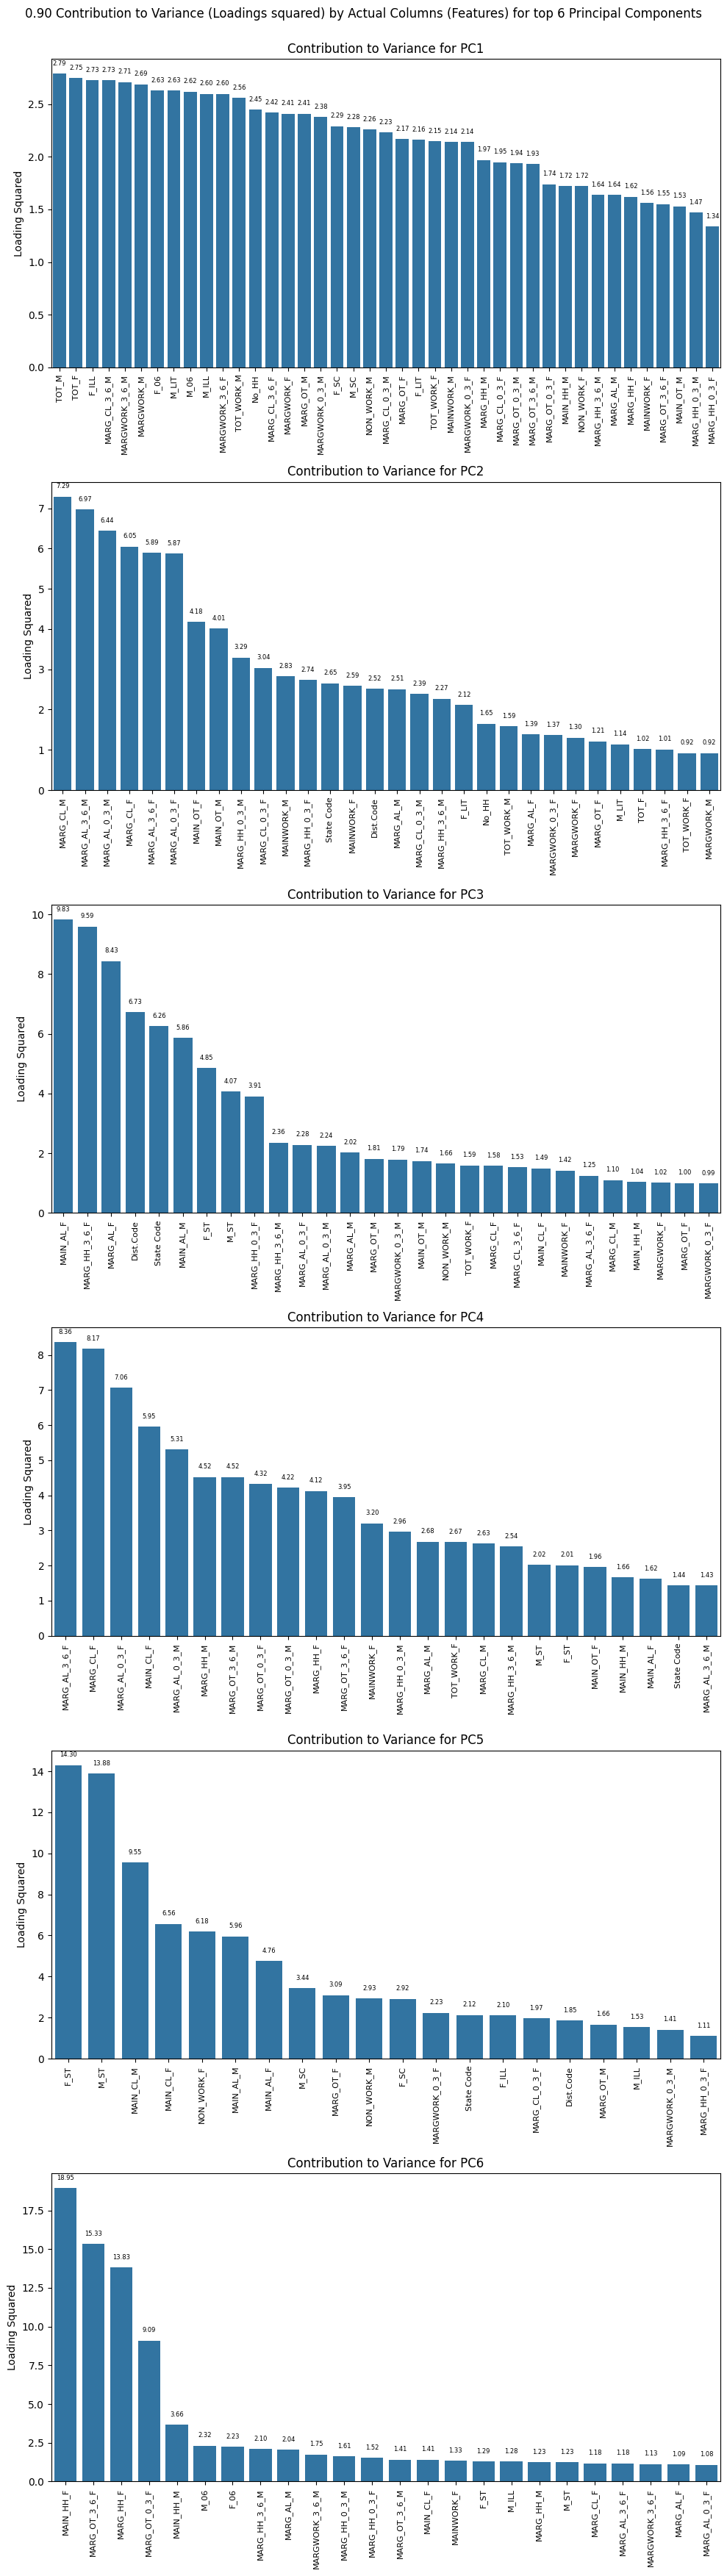

In [60]:
# ploting the loading squared(variance explained %) of the 1st 6 Principal components by actual freatures/columns. 
fig, ax = plt.subplots(nrows=6, ncols=1,figsize=(10,35))
for i, col in enumerate(first_6_component_loadings.columns):
    component_loadings_sort = first_6_component_loadings[col].pow(2).sort_values(ascending=False)
    component_loadings_sort_cumsum = component_loadings_sort.cumsum()
    mask = component_loadings_sort_cumsum <= threshold
    component_loadings_sort = round(component_loadings_sort[mask]*100,2)
    axes = ax[i]
    sns.barplot(x=component_loadings_sort.index.values,y=component_loadings_sort, ax = axes)
    axes.set_title(f'Contribution to Variance for {col}')
    axes.set_ylabel(f'Loading Squared')
    axes.set_xticklabels(axes.get_xticklabels(),rotation=90,fontsize=8)
    for p in axes.patches:
        axes.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center',xytext = (0, 10), 
                         textcoords = 'offset points',fontsize=6)
plt.suptitle('0.90 Contribution to Variance (Loadings squared) by Actual Columns (Features) for top 6 Principal Components',y=1)
plt.tight_layout()
plt.savefig('./images/pca_1st_three_loadings_squared.svg')
plt.show()

##### Write inferences about all the PCs in terms of actual variables
Below is listed the Inferences of the PCs in terms of actual variables.

In [61]:
# Indentify which feature is explainning the most variance in each or the 6 PCs
for i, col in enumerate(first_6_component_loadings.columns):
    print(f"Inferences for {col}:")
    print("="*200)
    component_loadings_sort = first_6_component_loadings[col].pow(2).sort_values(ascending=False)
    print(f"The feature explaining most that the variance for {col} is, {component_loadings_sort.index[0]}, it expains {round(component_loadings_sort.iloc[0]*100,2)}% of the variance in {col}.")
    print(f'There is a {round(first_6_component_loadings[col].loc[component_loadings_sort.index[0]]*100,3)}% Increase(if % is positive) or Decrease (if % is negative) in {col} for every one unit increase in Scaled {component_loadings_sort.index[0]}')
    print("="*200)
    print(f"Features explaining ~90% of the variance of {col} in desending order are:")
    component_loadings_sort_cumsum = component_loadings_sort.cumsum()
    mask = component_loadings_sort_cumsum <= threshold
    component_loadings_sort = round(component_loadings_sort[mask]*100,2)
    for idx,f in enumerate(component_loadings_sort):
        print(f'{component_loadings_sort.index[idx]}:{f}%: There is a {round(first_6_component_loadings[col].loc[component_loadings_sort.index[idx]]*100,3)}% Increase(if % is positive) or Decrease (if % is negative) in {col} for every one unit increase in Scaled {component_loadings_sort.index[idx]}.')

Inferences for PC1:
The feature explaining most that the variance for PC1 is, TOT_M, it expains 2.79% of the variance in PC1.
There is a 16.704% Increase(if % is positive) or Decrease (if % is negative) in PC1 for every one unit increase in Scaled TOT_M
Features explaining ~90% of the variance of PC1 in desending order are:
TOT_M:2.79%: There is a 16.704% Increase(if % is positive) or Decrease (if % is negative) in PC1 for every one unit increase in Scaled TOT_M.
TOT_F:2.75%: There is a 16.57% Increase(if % is positive) or Decrease (if % is negative) in PC1 for every one unit increase in Scaled TOT_F.
F_ILL:2.73%: There is a 16.522% Increase(if % is positive) or Decrease (if % is negative) in PC1 for every one unit increase in Scaled F_ILL.
MARG_CL_3_6_M:2.73%: There is a 16.509% Increase(if % is positive) or Decrease (if % is negative) in PC1 for every one unit increase in Scaled MARG_CL_3_6_M.
MARGWORK_3_6_M:2.71%: There is a 16.471% Increase(if % is positive) or Decrease (if % is ne

##### Write linear equation for first PC
Below is given the linear equation in the format PC1 = c1*x1+c2*x2....+ci*xi, where the c1,c2,...,ci are the coffients given by the eigenvectors and x1,x2,...,xi are the values of the actual columns, e.g. 'State Code','No_HH','TOT_F','M_SC' etc.

In [62]:
first_6_component_loadings.iloc[:,0].name
equation = f'{first_6_component_loadings.iloc[:,0].name} = '
equ_terms = []
for idx, vec in enumerate(first_6_component_loadings.iloc[:,0]):
    equ_terms.append(f'{round(vec,5)}*{first_6_component_loadings.index[idx]}')
for idx , term in enumerate(equ_terms):
    if idx == 0:
        equation = equation+" ("+term+")"
    else:
        equation = equation+" + ("+term+")"
equation

'PC1 =  (0.03007*State Code) + (0.03008*Dist.Code) + (0.15643*No_HH) + (0.16704*TOT_M) + (0.1657*TOT_F) + (0.16187*M_06) + (0.16227*F_06) + (0.15107*M_SC) + (0.15148*F_SC) + (0.02766*M_ST) + (0.02866*F_ST) + (0.16203*M_LIT) + (0.14712*F_LIT) + (0.16135*M_ILL) + (0.16522*F_ILL) + (0.15999*TOT_WORK_M) + (0.14648*TOT_WORK_F) + (0.14645*MAINWORK_M) + (0.1247*MAINWORK_F) + (0.10284*MAIN_CL_M) + (0.07464*MAIN_CL_F) + (0.11376*MAIN_AL_M) + (0.07479*MAIN_AL_F) + (0.13128*MAIN_HH_M) + (0.0836*MAIN_HH_F) + (0.12379*MAIN_OT_M) + (0.1115*MAIN_OT_F) + (0.16414*MARGWORK_M) + (0.15526*MARGWORK_F) + (0.08147*MARG_CL_M) + (0.04841*MARG_CL_F) + (0.12817*MARG_AL_M) + (0.11446*MARG_AL_F) + (0.14027*MARG_HH_M) + (0.12742*MARG_HH_F) + (0.15515*MARG_OT_M) + (0.14741*MARG_OT_F) + (0.16471*MARGWORK_3_6_M) + (0.16121*MARGWORK_3_6_F) + (0.16509*MARG_CL_3_6_M) + (0.15562*MARG_CL_3_6_F) + (0.09213*MARG_AL_3_6_M) + (0.05078*MARG_AL_3_6_F) + (0.12819*MARG_HH_3_6_M) + (0.11091*MARG_HH_3_6_F) + (0.13903*MARG_OT_3_6_M)